In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Disable python warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
rp_df = pd.read_csv('retail_price.csv')
# Top & Last 5 rows of data
rp_df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


## I made a few strategies to deal with data.

### 1. Understanding Data

### 2. EDA

### 3. Data preprocessing

### 4. Model building, cross-validation, and evaluation

### 5. Model Testing

## 1. Understanding Data

In [3]:
# Data shape
rp_df.shape

(676, 30)

In [4]:
# Column dtype
rp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [5]:
# Numerical columns
num = [col for col in rp_df.columns if (rp_df[col].dtype == 'int64') | (rp_df[col].dtype == 'float64')]
print(num)
print('Length of numerical columns :', len(num))

['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']
Length of numerical columns : 27


In [6]:
# Categorical columns
cat = [cols for cols in rp_df.columns if rp_df[cols].dtype == 'O']
print(cat)
print('Length of categorical columns :', len(cat))

['product_id', 'product_category_name', 'month_year']
Length of categorical columns : 3


In [7]:
# Use Describe statistics
rp_df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [8]:
# Use Describe statistics
rp_df.describe(include='all')

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676,676,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,52,9,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,health5,garden_tools,01-03-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,160,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,NaN,NaN,NaN,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,NaN,NaN,NaN,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,NaN,NaN,NaN,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,NaN,NaN,NaN,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,NaN,NaN,NaN,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000


In [9]:
# Check null values
rp_df.isna().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [10]:
# Check duplicate values
rp_df.duplicated().sum()

0

## 2. EDA

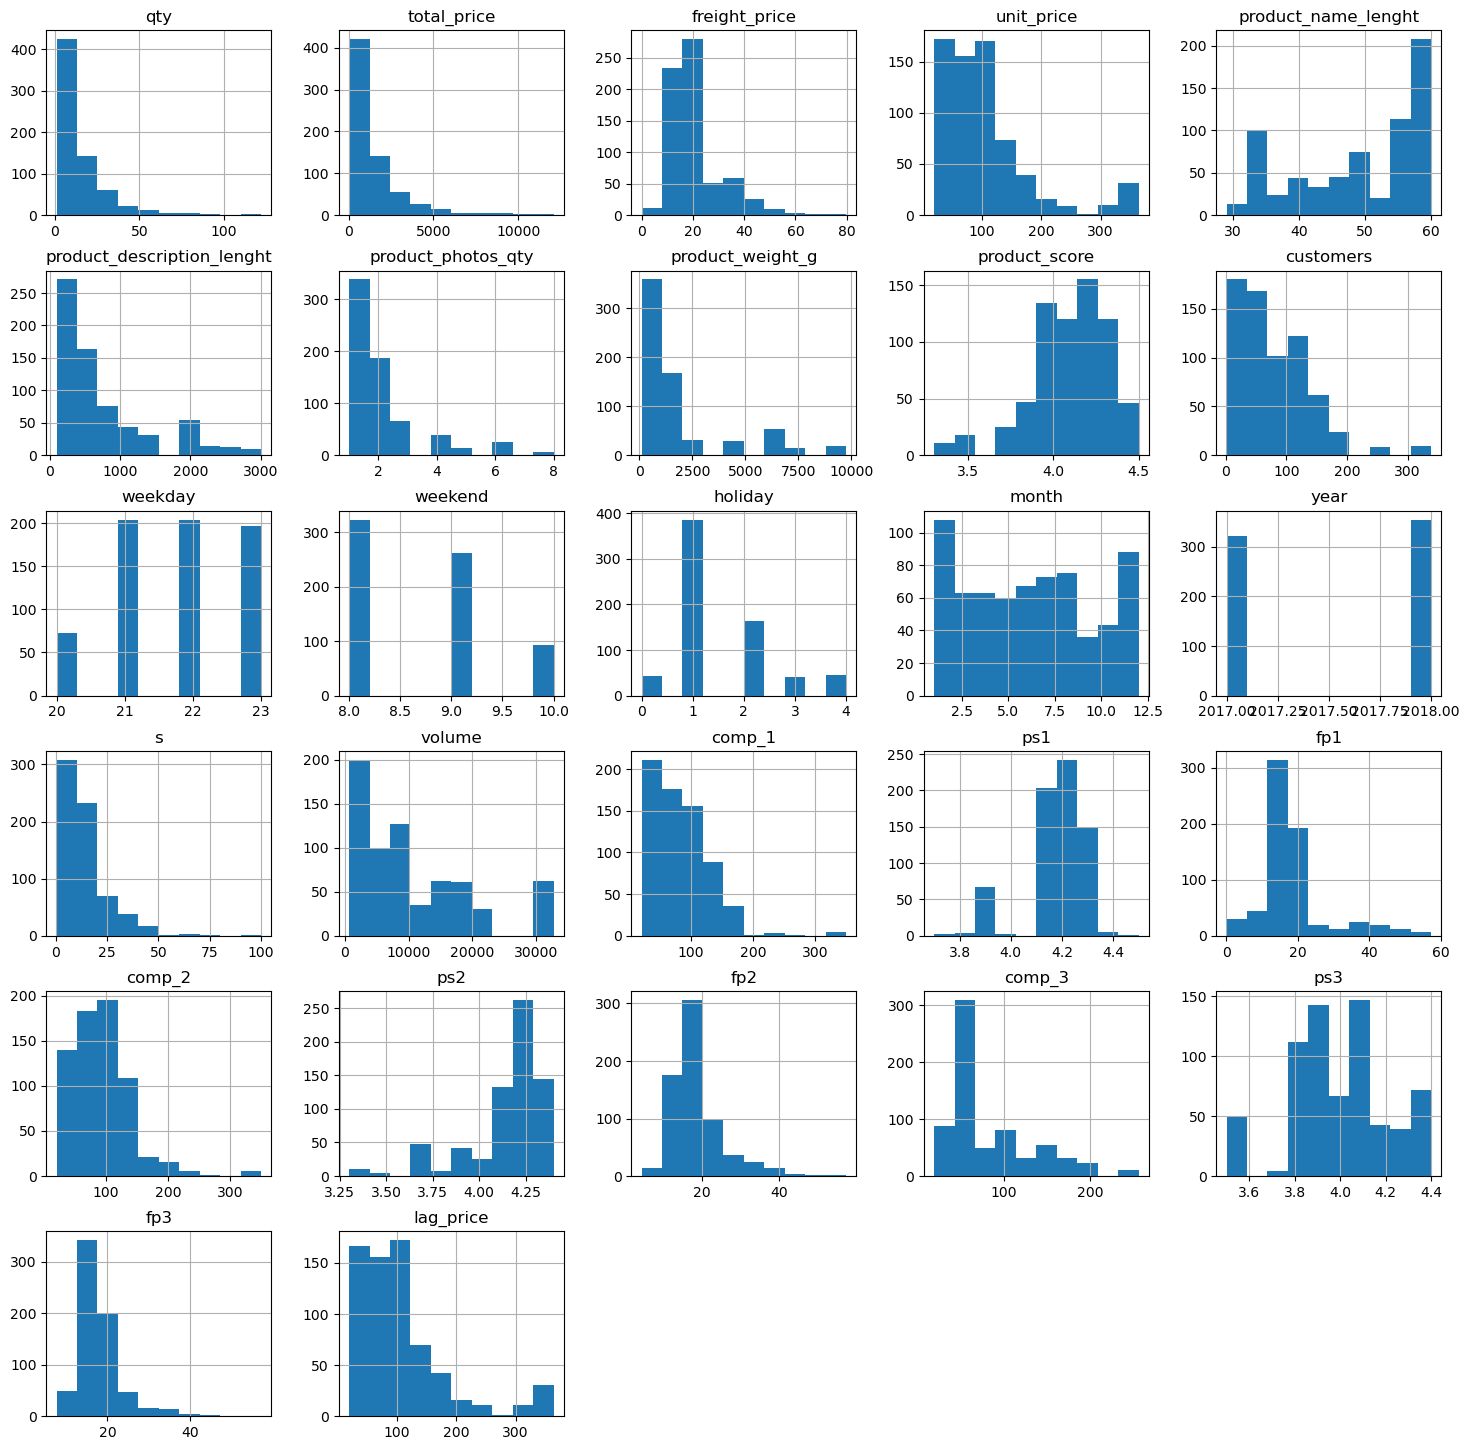

In [11]:
# Graph histogram
rp_df.hist(figsize=(18,18))
plt.show()

In [12]:
# Check skewness 
rp_df[['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght', 'product_description_lenght', 
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers', 's', 'volume', 'comp_1', 'ps1', 
       'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']].skew()

qty                           2.673537
total_price                   2.613959
freight_price                 1.845973
unit_price                    1.778753
product_name_lenght          -0.530015
product_description_lenght    1.553698
product_photos_qty            1.889226
product_weight_g              1.786142
product_score                -1.031801
customers                     1.402722
s                             2.412168
volume                        1.159486
comp_1                        1.368864
ps1                          -0.880049
fp1                           1.643677
comp_2                        1.637614
ps2                          -1.660675
fp2                           1.688701
comp_3                        1.218799
ps3                          -0.157780
fp3                           2.191181
lag_price                     1.732439
dtype: float64

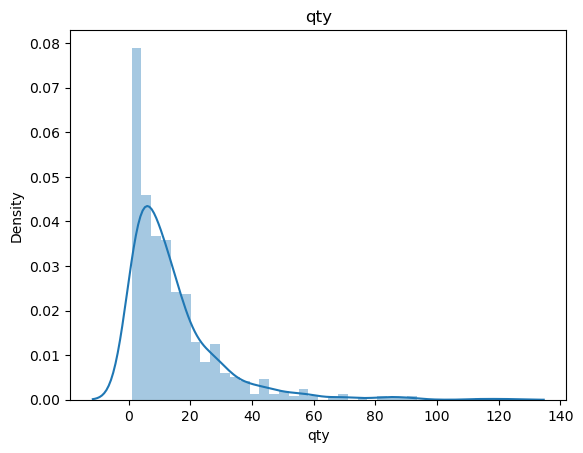

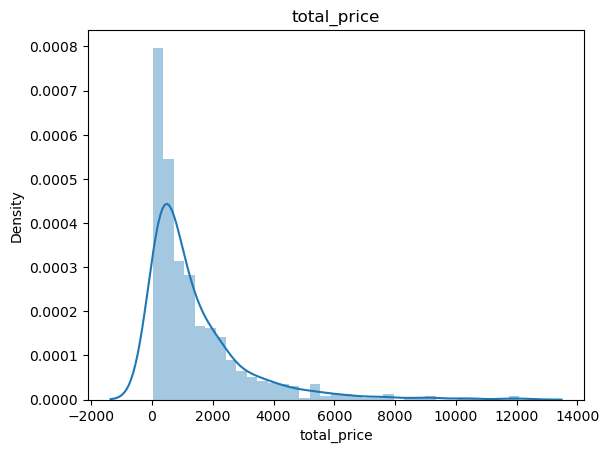

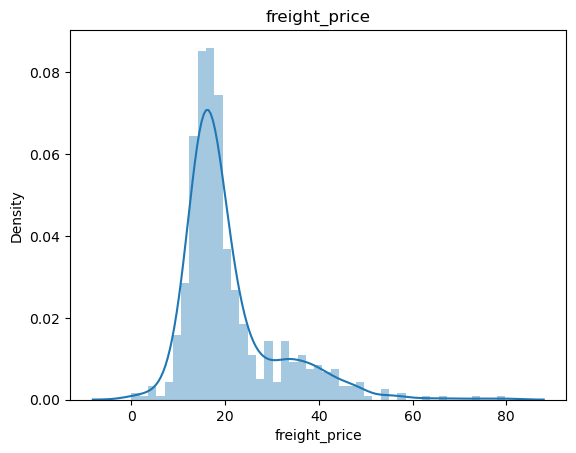

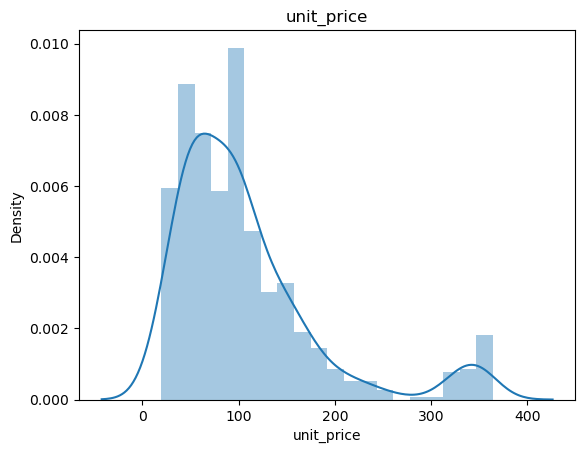

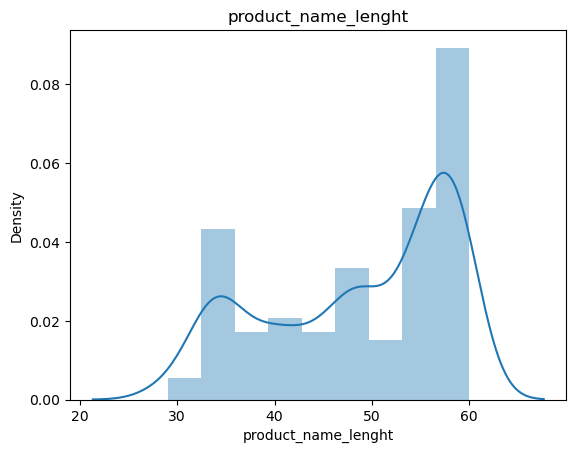

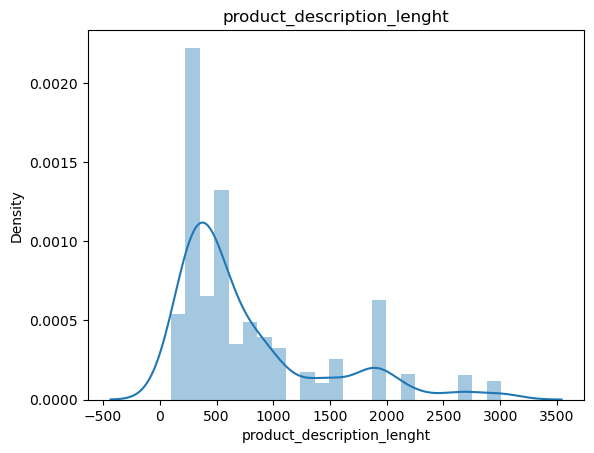

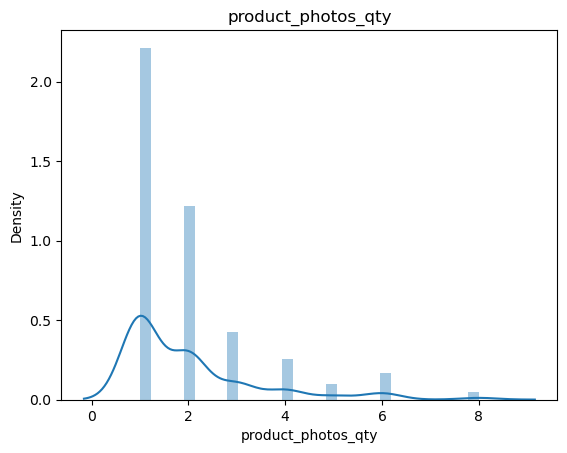

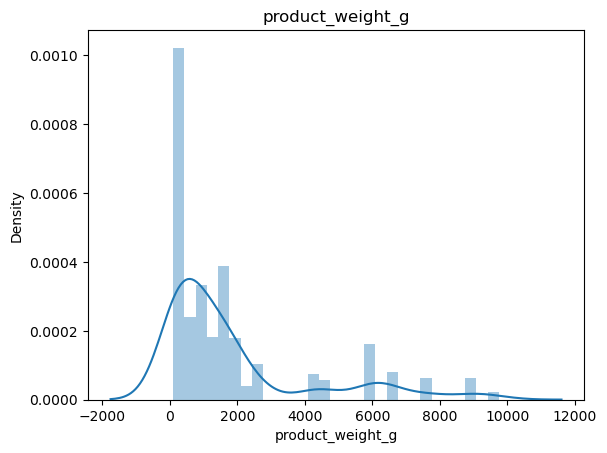

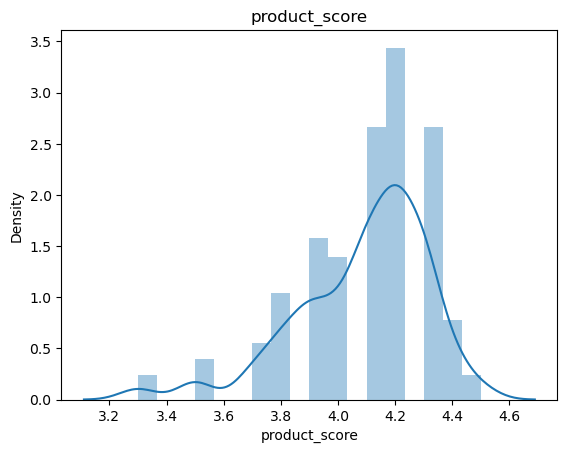

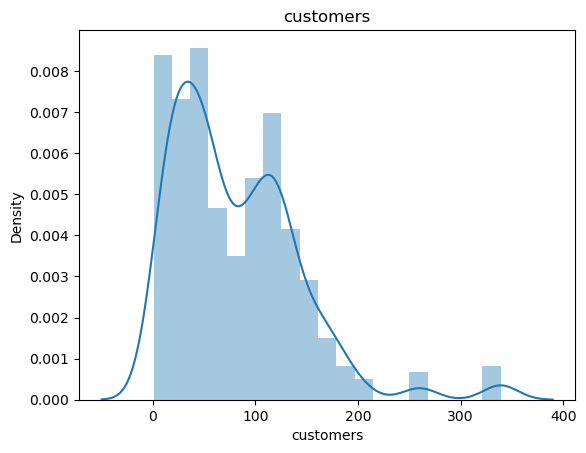

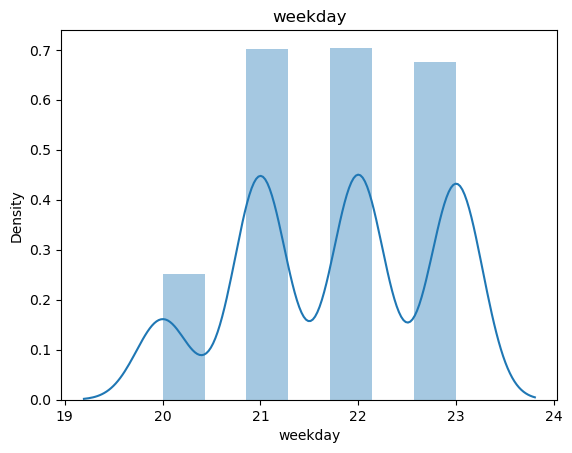

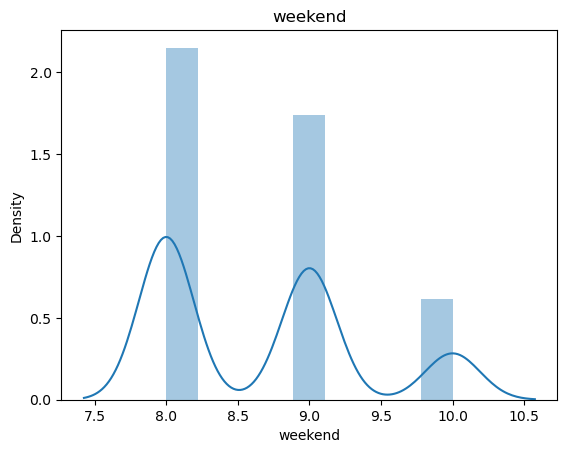

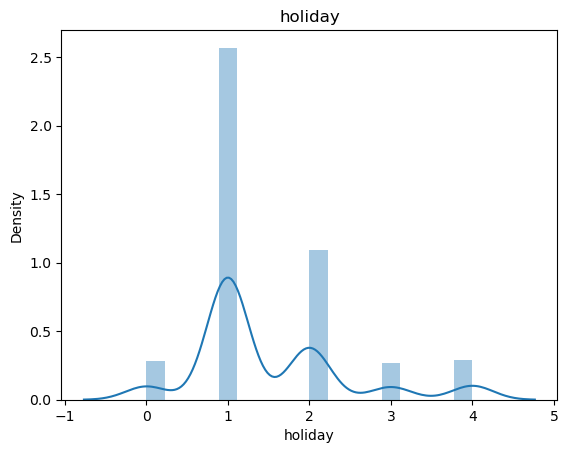

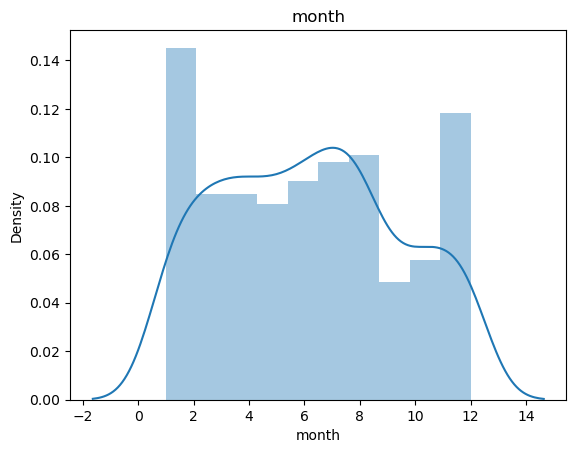

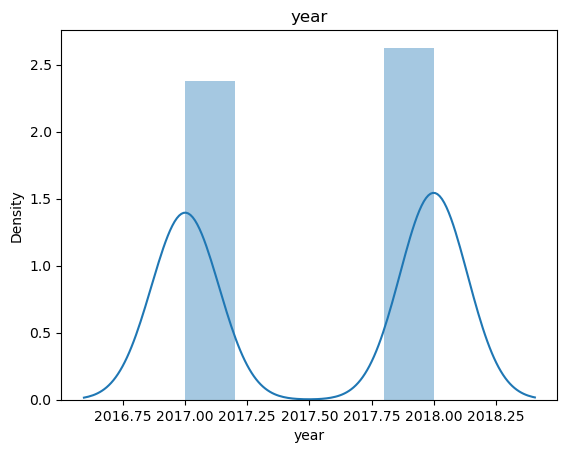

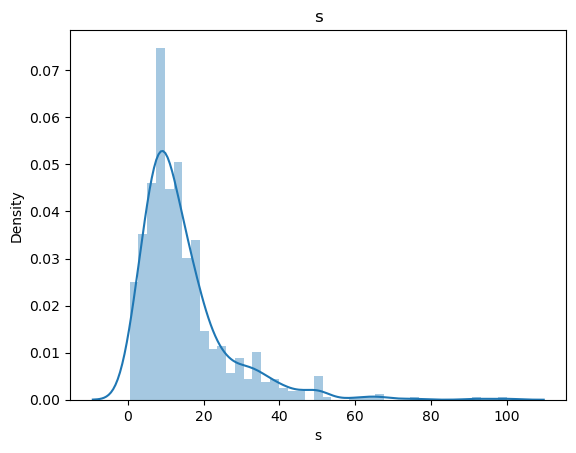

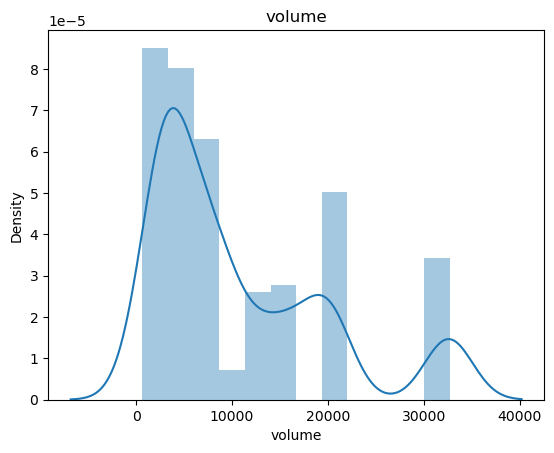

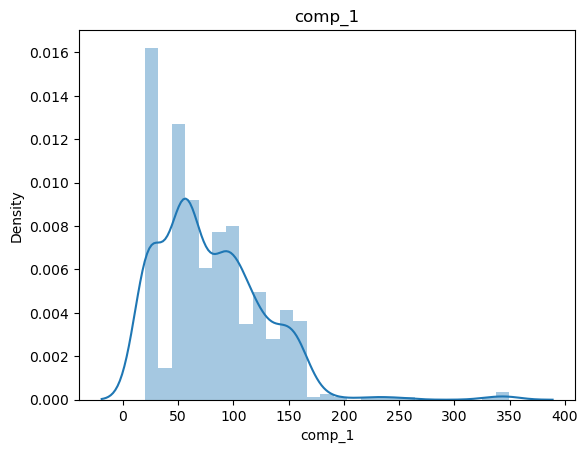

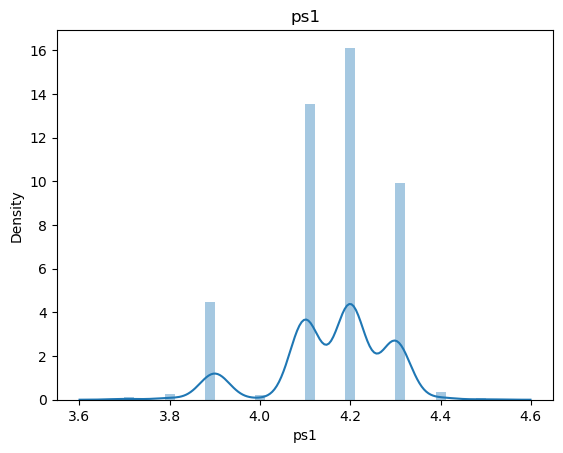

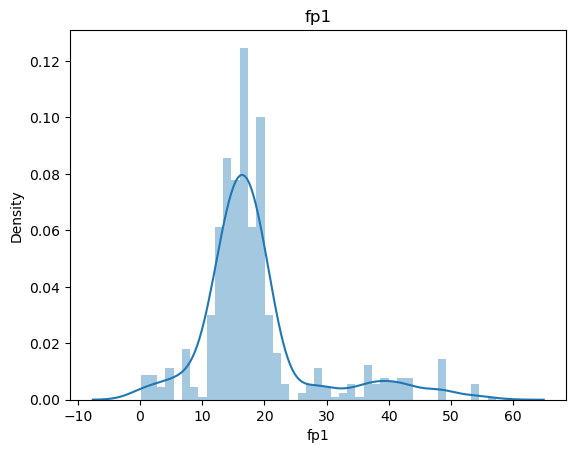

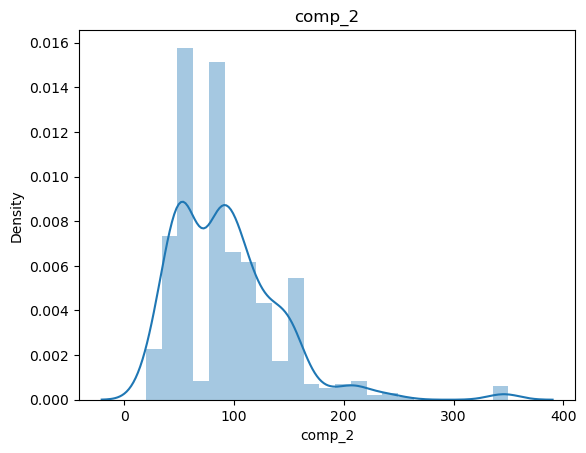

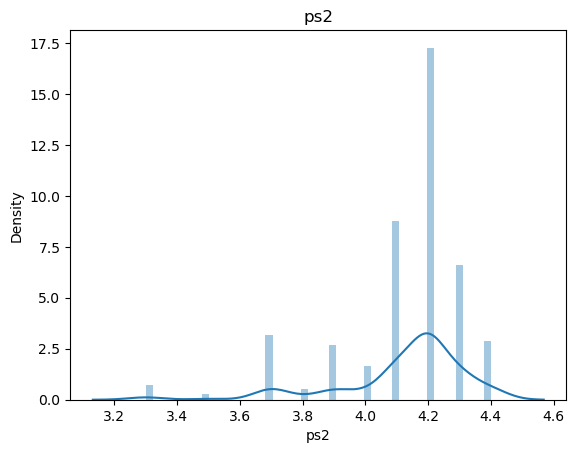

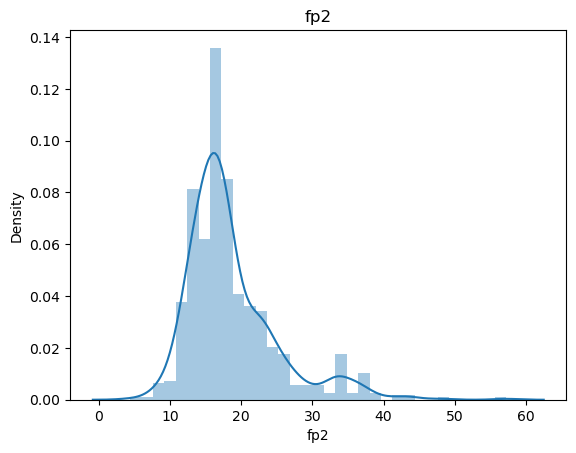

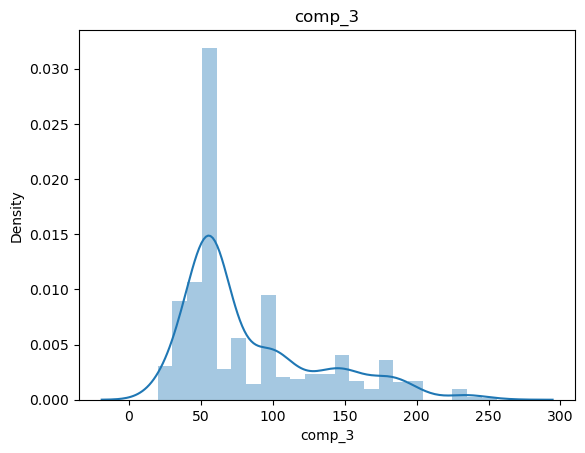

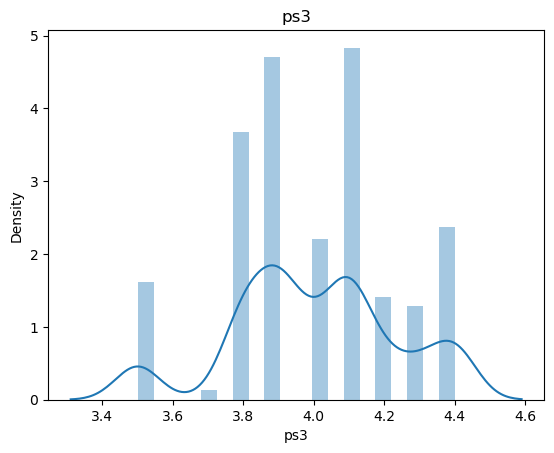

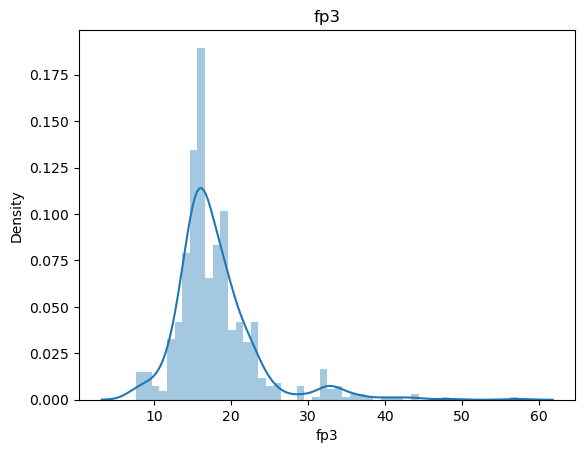

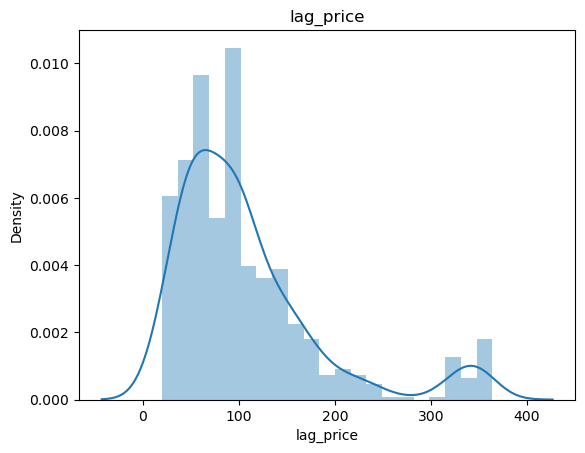

In [13]:
# Numerical col distplot
for i in num:
    sns.distplot(rp_df[i])
    plt.title(i)
    plt.show()

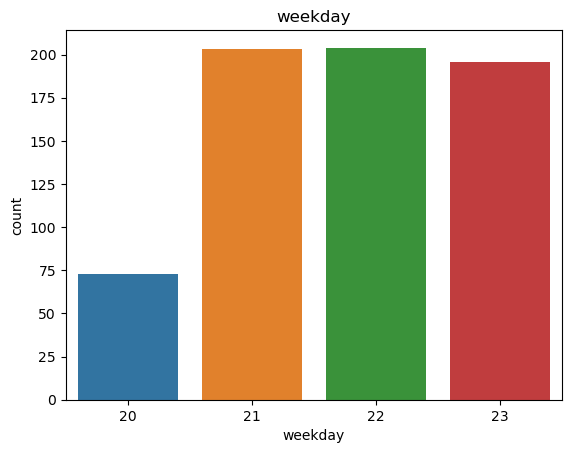

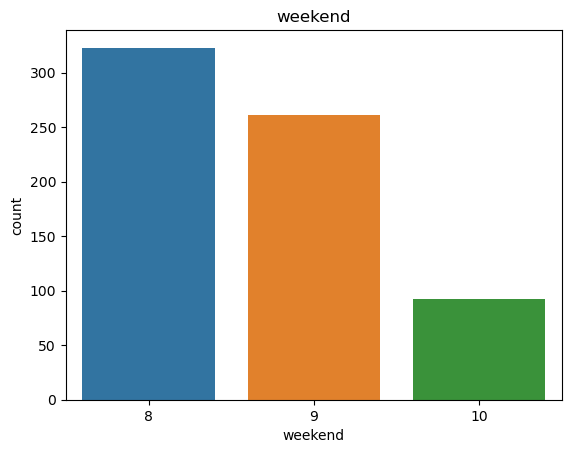

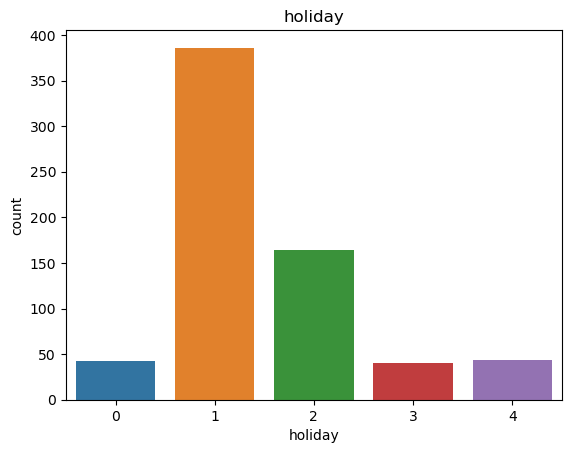

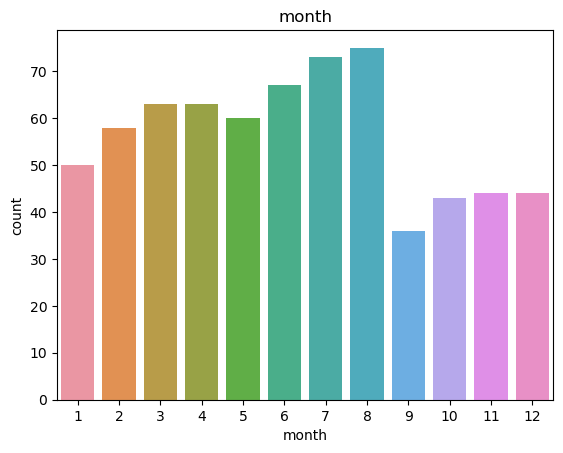

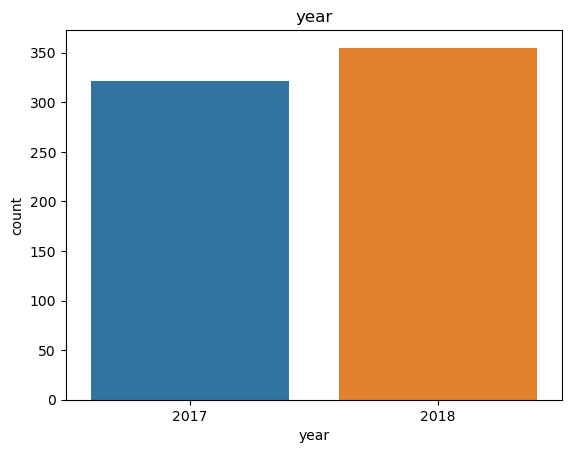

In [14]:
# Countplot of columns 'weekday', 'weekend', 'holiday', 'month', 'year'
days = ['weekday', 'weekend', 'holiday', 'month', 'year']

for i in days:
    sns.countplot(data=rp_df, x=rp_df[i])
    plt.title(i)
    plt.show()

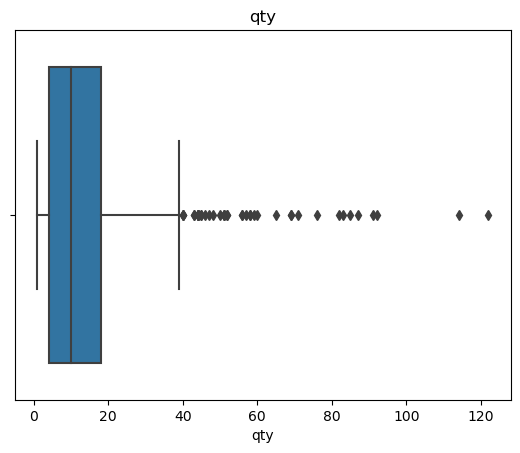

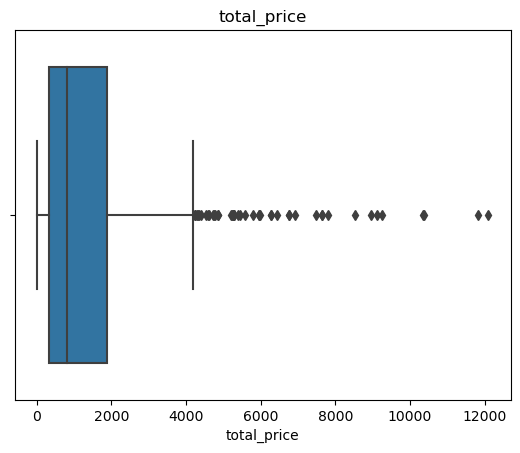

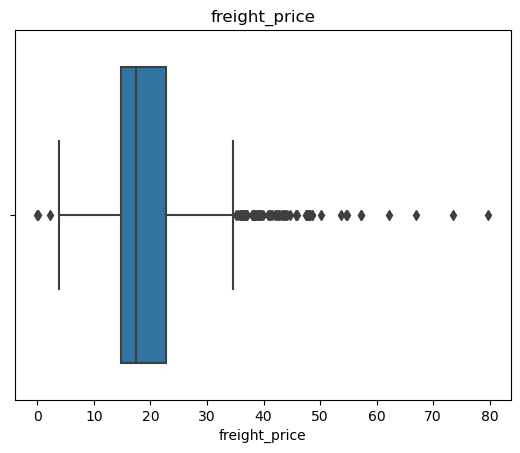

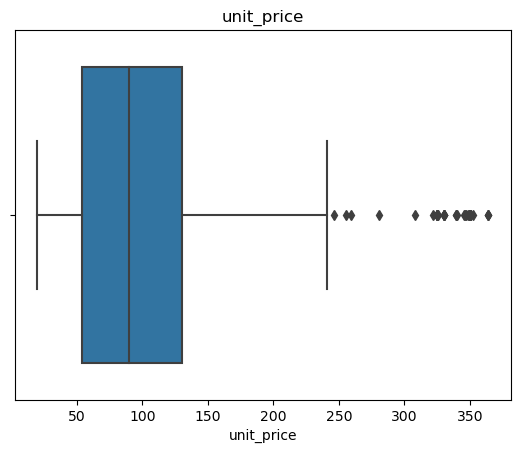

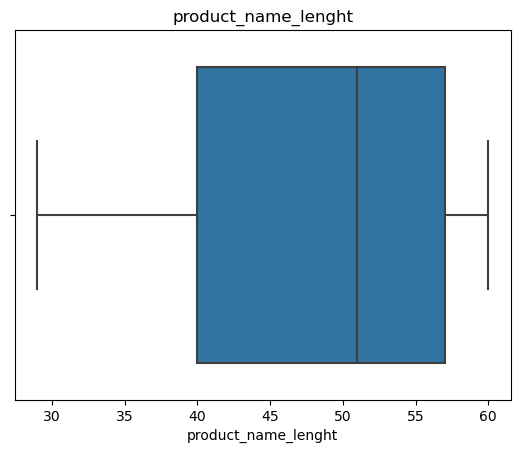

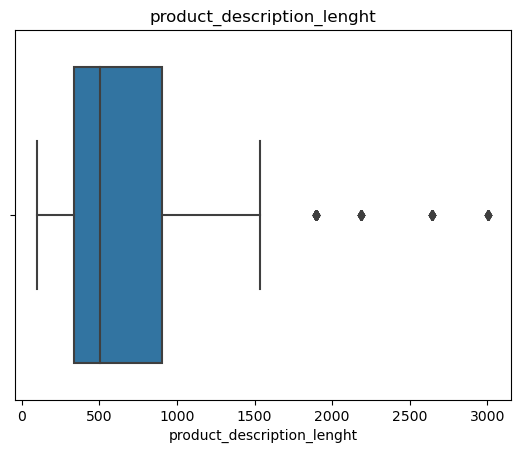

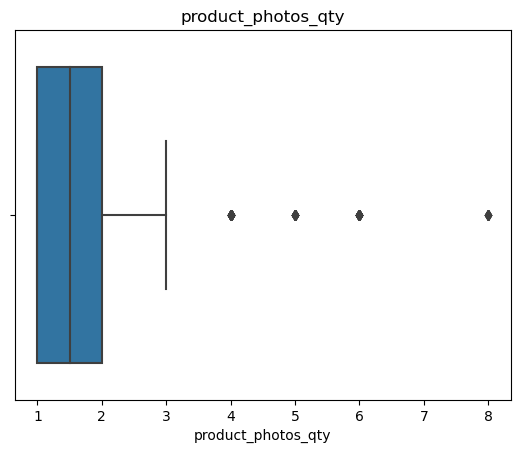

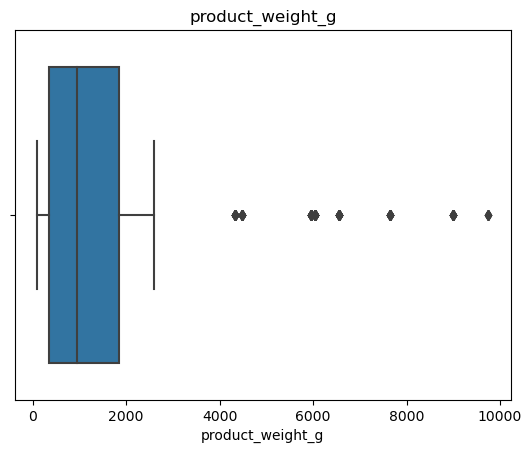

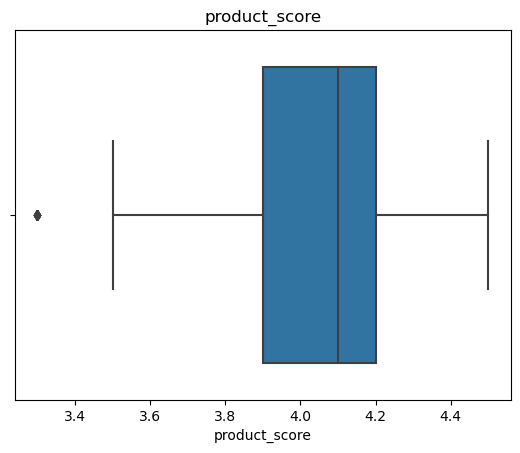

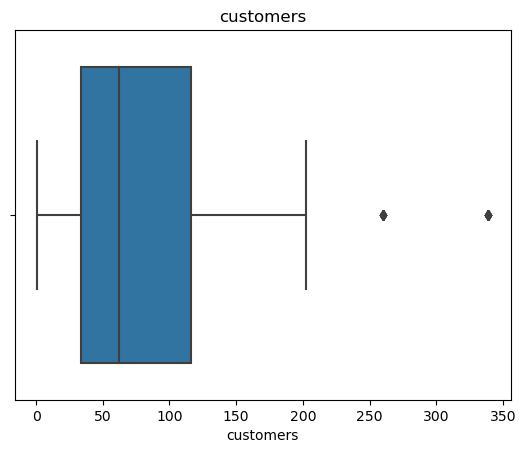

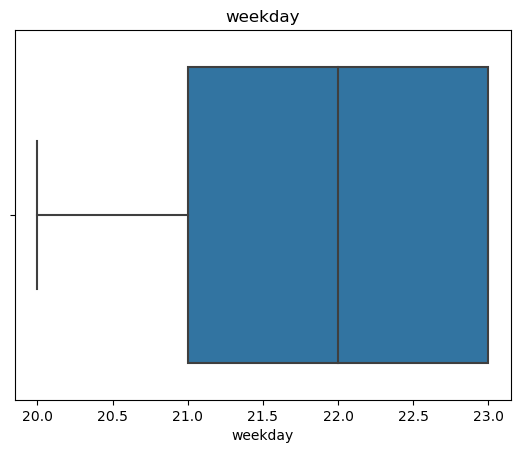

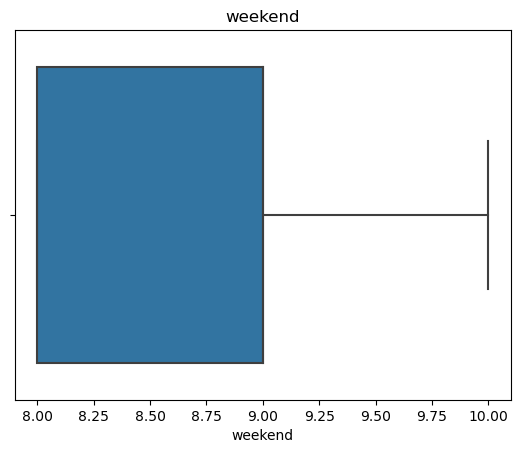

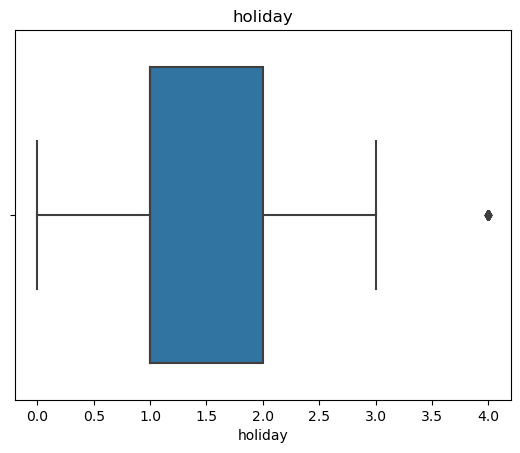

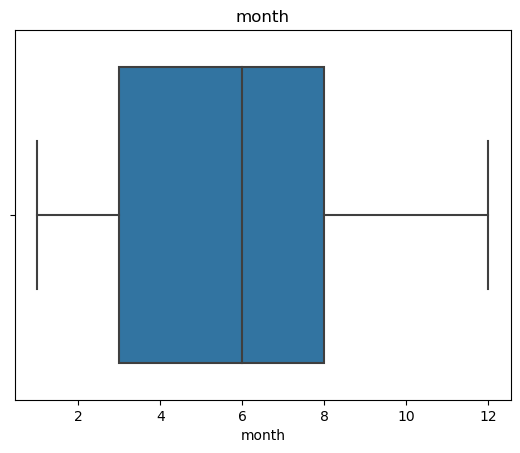

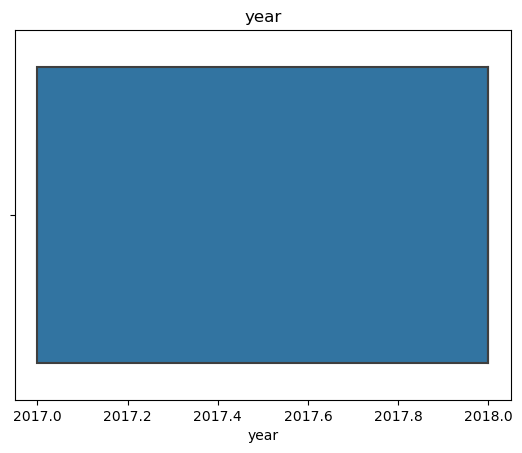

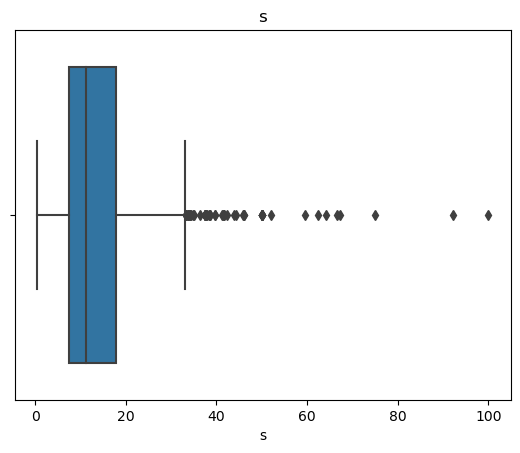

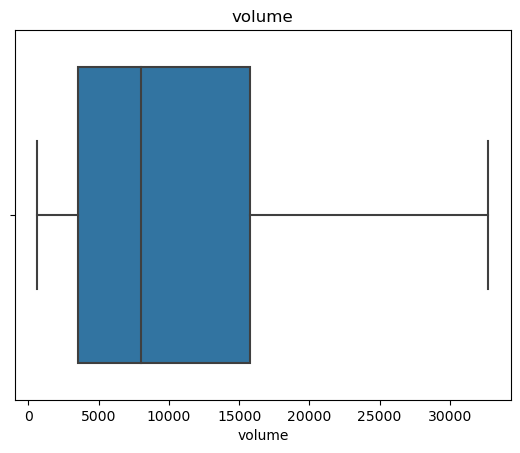

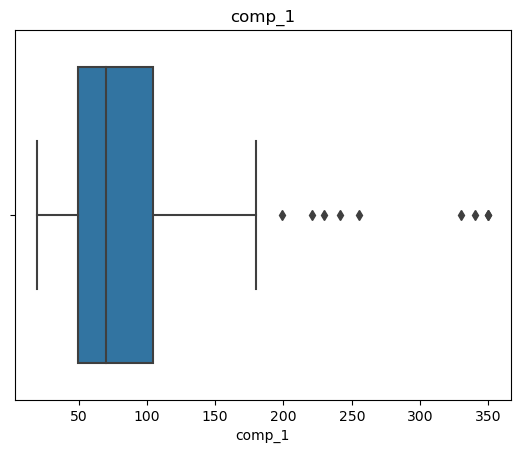

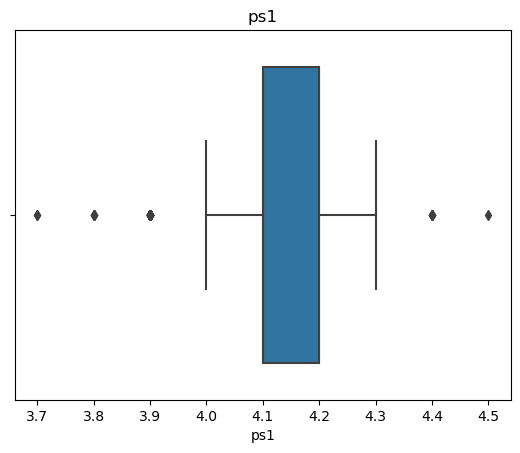

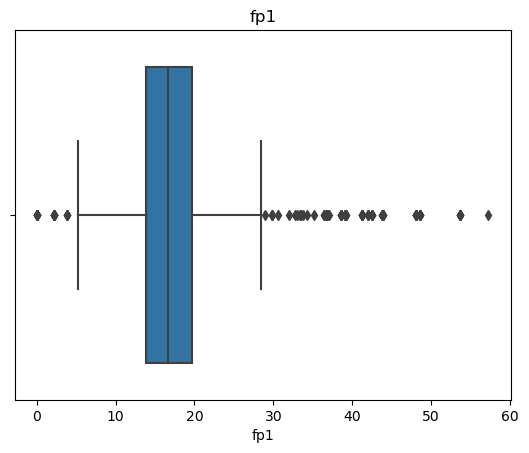

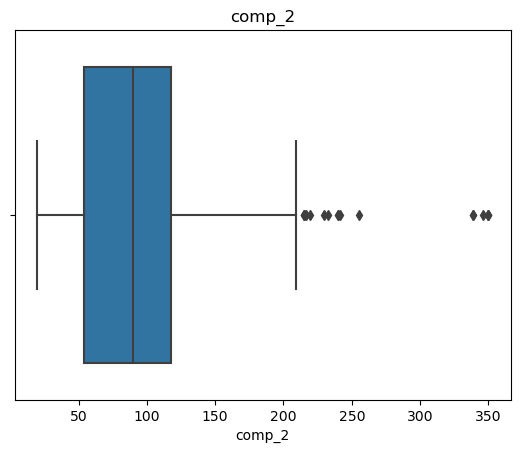

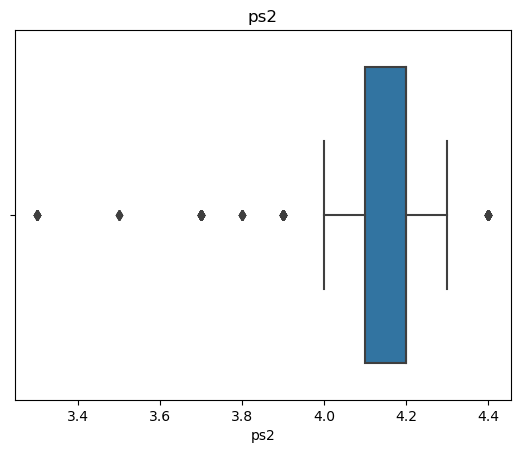

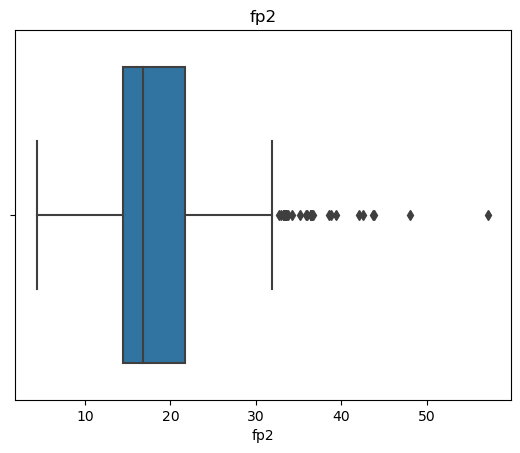

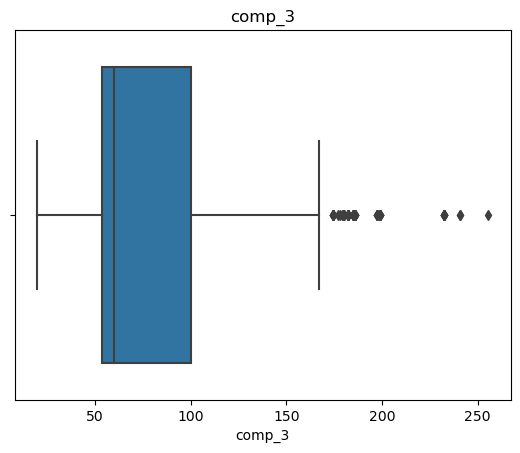

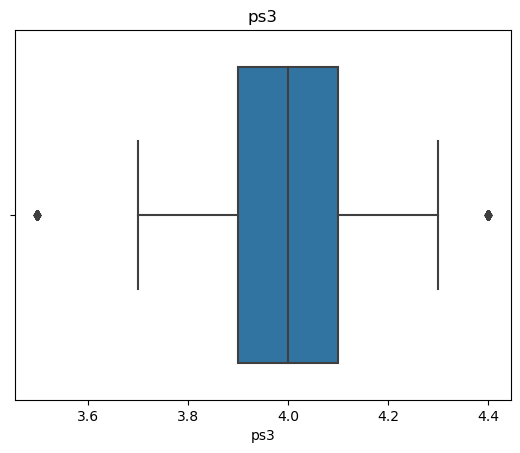

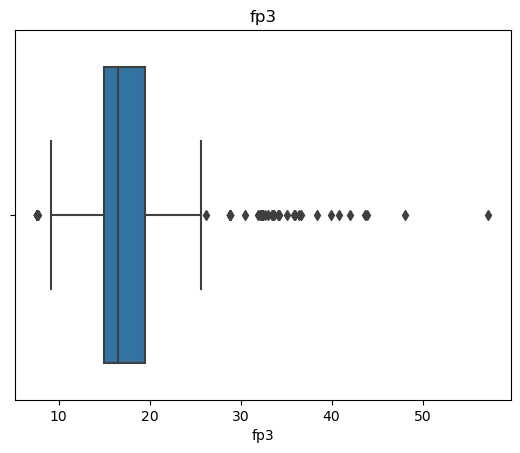

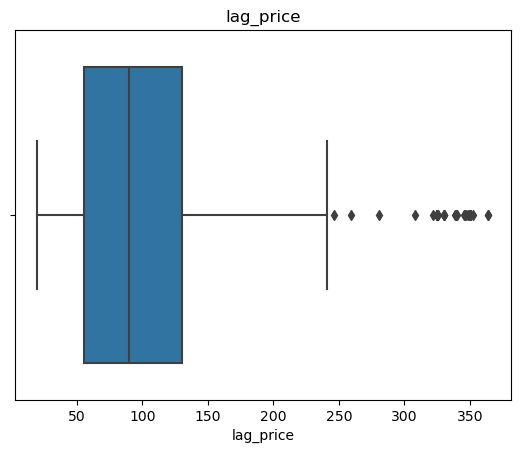

In [15]:
# Graph boxplot of numerical cols
for i in num:
    sns.boxplot(data=rp_df, x=rp_df[i])
    plt.title(i)
    plt.show()

product_category_name Unique col name : ['bed_bath_table' 'garden_tools' 'consoles_games' 'health_beauty'
 'cool_stuff' 'perfumery' 'computers_accessories' 'watches_gifts'
 'furniture_decor']
product_category_name
garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: count, dtype: int64
product_category_name Length is :  9


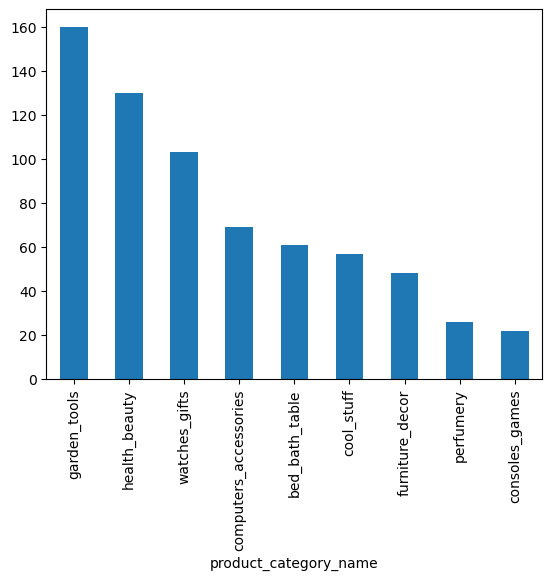

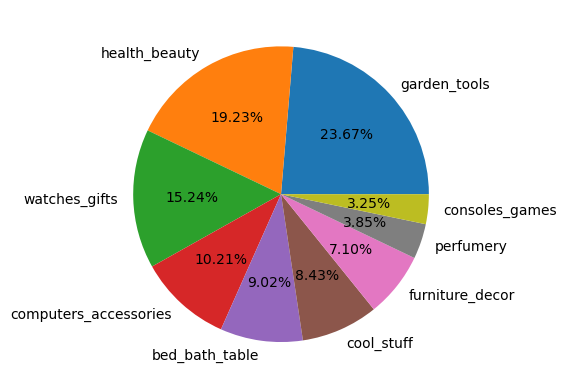

In [16]:
# Dealing with categorical cols
a = []
for i in cat:
        len(rp_df[i].value_counts())
        if len(rp_df[i].value_counts()) < 12:
            print(i, 'Unique col name :', rp_df[i].unique())
            print(rp_df[i].value_counts())
            print(i,'Length is : ',len(rp_df[i].value_counts()))

            rp_df[i].value_counts().plot(kind='bar')
            plt.show()

            label = rp_df[i].value_counts().index
            plt.pie(rp_df[i].value_counts(), labels=label, autopct='%.2f%%')
            plt.show()
        else:
            a.append(i)

In [17]:
a

['product_id', 'month_year']

['bed1' 'garden5' 'consoles1' 'garden7' 'health9' 'cool4' 'health3'
 'perfumery1' 'cool5' 'health8' 'garden4' 'computers5' 'garden10'
 'computers6' 'health6' 'garden6' 'health10' 'watches2' 'health1'
 'garden8' 'garden9' 'watches6' 'cool3' 'perfumery2' 'cool2' 'computers1'
 'consoles2' 'health5' 'watches8' 'furniture4' 'watches5' 'health7' 'bed3'
 'garden3' 'bed2' 'furniture3' 'watches4' 'watches3' 'furniture2'
 'garden2' 'furniture1' 'health2' 'garden1' 'cool1' 'computers4'
 'watches7' 'computers3' 'health4' 'watches1' 'computers2' 'bed4' 'bed5']
product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2

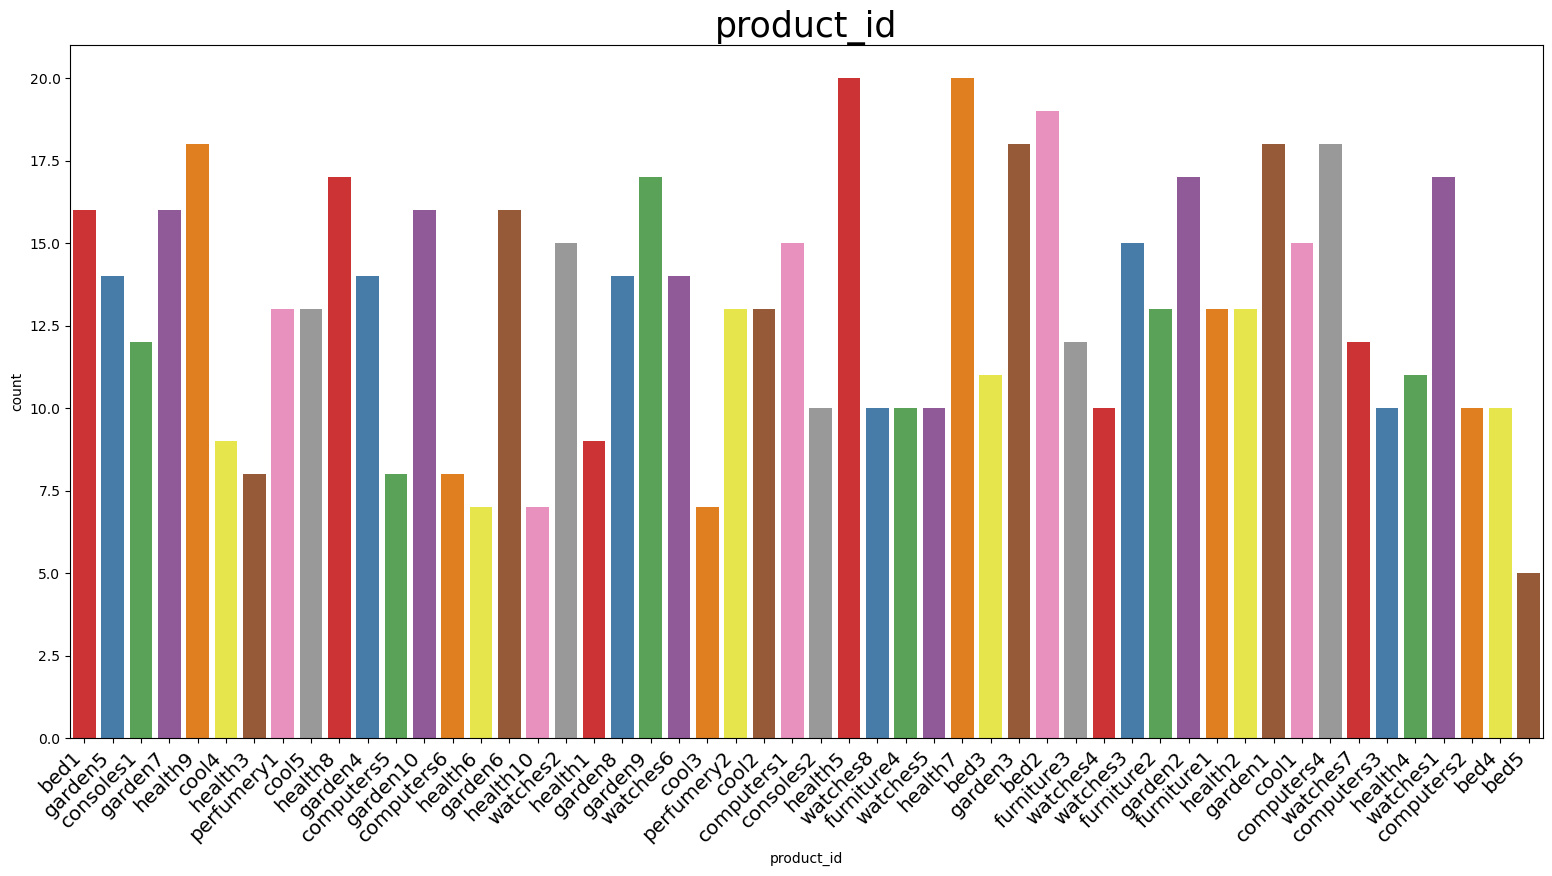

['01-05-2017' '01-06-2017' '01-07-2017' '01-08-2017' '01-09-2017'
 '01-10-2017' '01-11-2017' '01-12-2017' '01-01-2018' '01-02-2018'
 '01-03-2018' '01-04-2018' '01-05-2018' '01-06-2018' '01-07-2018'
 '01-08-2018' '01-03-2017' '01-04-2017' '01-02-2017' '01-01-2017']
month_year
01-03-2018    50
01-02-2018    49
01-01-2018    48
01-04-2018    48
01-11-2017    44
01-12-2017    44
01-10-2017    43
01-06-2018    42
01-05-2018    40
01-07-2018    40
01-08-2018    38
01-08-2017    37
01-09-2017    36
01-07-2017    33
01-06-2017    25
01-05-2017    20
01-04-2017    15
01-03-2017    13
01-02-2017     9
01-01-2017     2
Name: count, dtype: int64
month_year Length is :  20


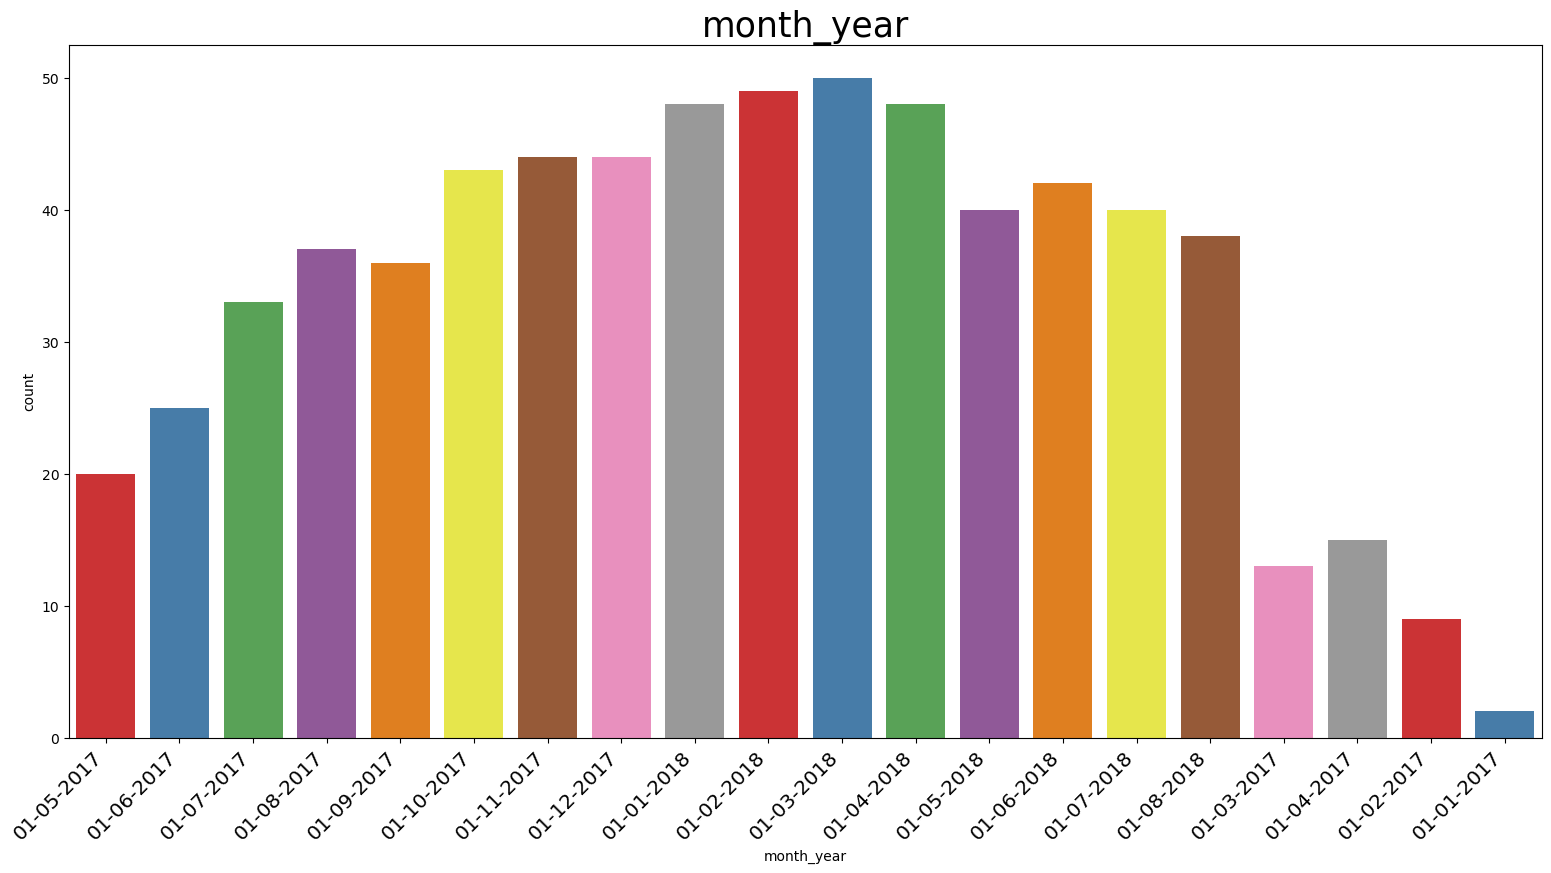

In [18]:
# Create a for loop to find the values in categorical cols

b = []
for i in a:
        len(rp_df[i].value_counts())

        
        if len(rp_df[i].value_counts()) < 100:
            print(rp_df[i].unique())
            print(rp_df[i].value_counts())     
            print(i,'Length is : ',len(rp_df[i].value_counts()))

            plt.figure(figsize=(19,9))
            chart = sns.countplot(data=rp_df, x=rp_df[i], palette='Set1')
            chart.set_xticklabels(
            chart.get_xticklabels(), 
            rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='x-large')   
            chart.set_title(i, fontdict={'size': 25})
            plt.show()
            
        else:
            b.append(i)

In [19]:
b

[]

In [20]:
rp_df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

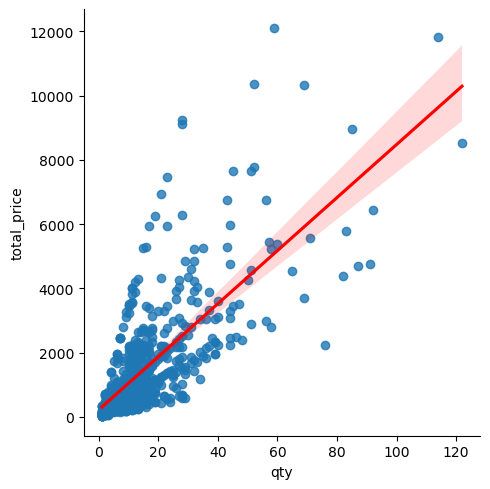

In [21]:
# Relationship b/w qty and total_price
sns.lmplot(data=rp_df, x='qty', y='total_price', line_kws=dict(color="r"))
plt.show()

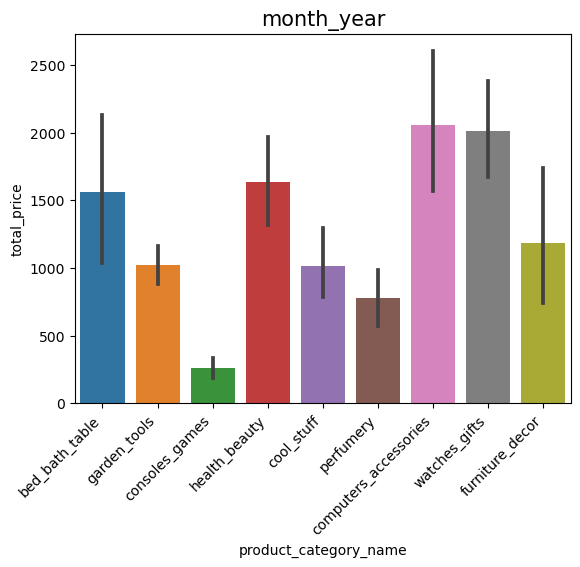

In [22]:
# Average of total prices by product categories
chart = sns.barplot(rp_df, x='product_category_name', y='total_price')
chart.set_xticklabels(
chart.get_xticklabels(), 
rotation=45, 
horizontalalignment='right',
)   
chart.set_title(i, fontdict={'size': 15})
plt.show()

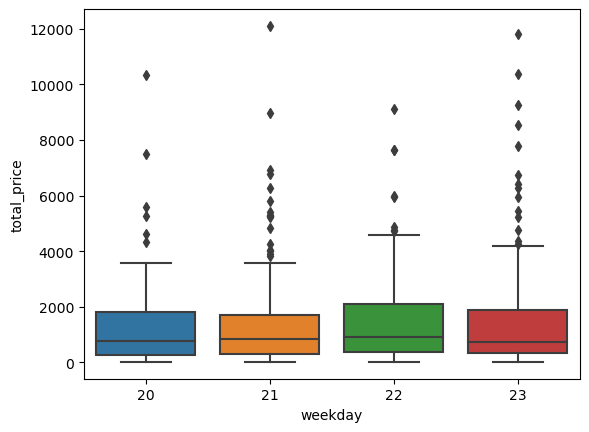

In [23]:
# Distribution of total prices by weekday
sns.boxplot(data=rp_df, x='weekday', y='total_price')
plt.show()

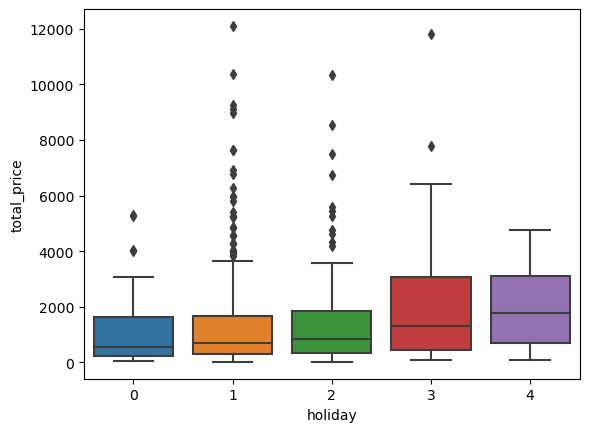

In [24]:
# Distribution of total prices by holiday
sns.boxplot(data=rp_df, x='holiday', y='total_price')
plt.show()

In [25]:
# Calculate the average competitor price difference by product category
rp_df['comp_price'] = rp_df['unit_price'] - rp_df['comp_1']

avg_price = rp_df.groupby('product_category_name')['comp_price'].mean().reset_index()

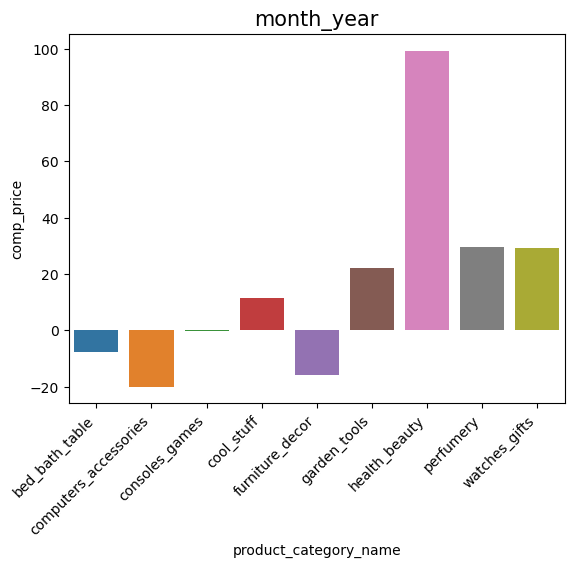

In [26]:
# Average of total prices by product categories
chart = sns.barplot(avg_price, x='product_category_name', y='comp_price')
chart.set_xticklabels(
chart.get_xticklabels(), 
rotation=45, 
horizontalalignment='right',
)   
chart.set_title(i, fontdict={'size': 15})
plt.show()

In [27]:
# Correlation between the numerical features
rp_df.corr(numeric_only=True)['total_price'].sort_values(ascending=False)*100


total_price                   100.000000
qty                            74.960518
lag_price                      42.625588
unit_price                     40.900141
customers                      38.638879
s                              33.450016
comp_price                     31.863573
comp_2                         20.305025
product_description_lenght     17.537600
product_photos_qty             15.794454
comp_1                         14.442618
holiday                        13.655786
comp_3                         12.111406
ps2                            11.317795
year                            8.213962
product_weight_g                6.009166
ps1                             5.894057
product_score                   3.611871
freight_price                   2.584783
weekday                         1.879753
fp2                            -0.124040
product_name_lenght            -0.259361
fp1                            -0.672939
month                          -2.991751
weekend         

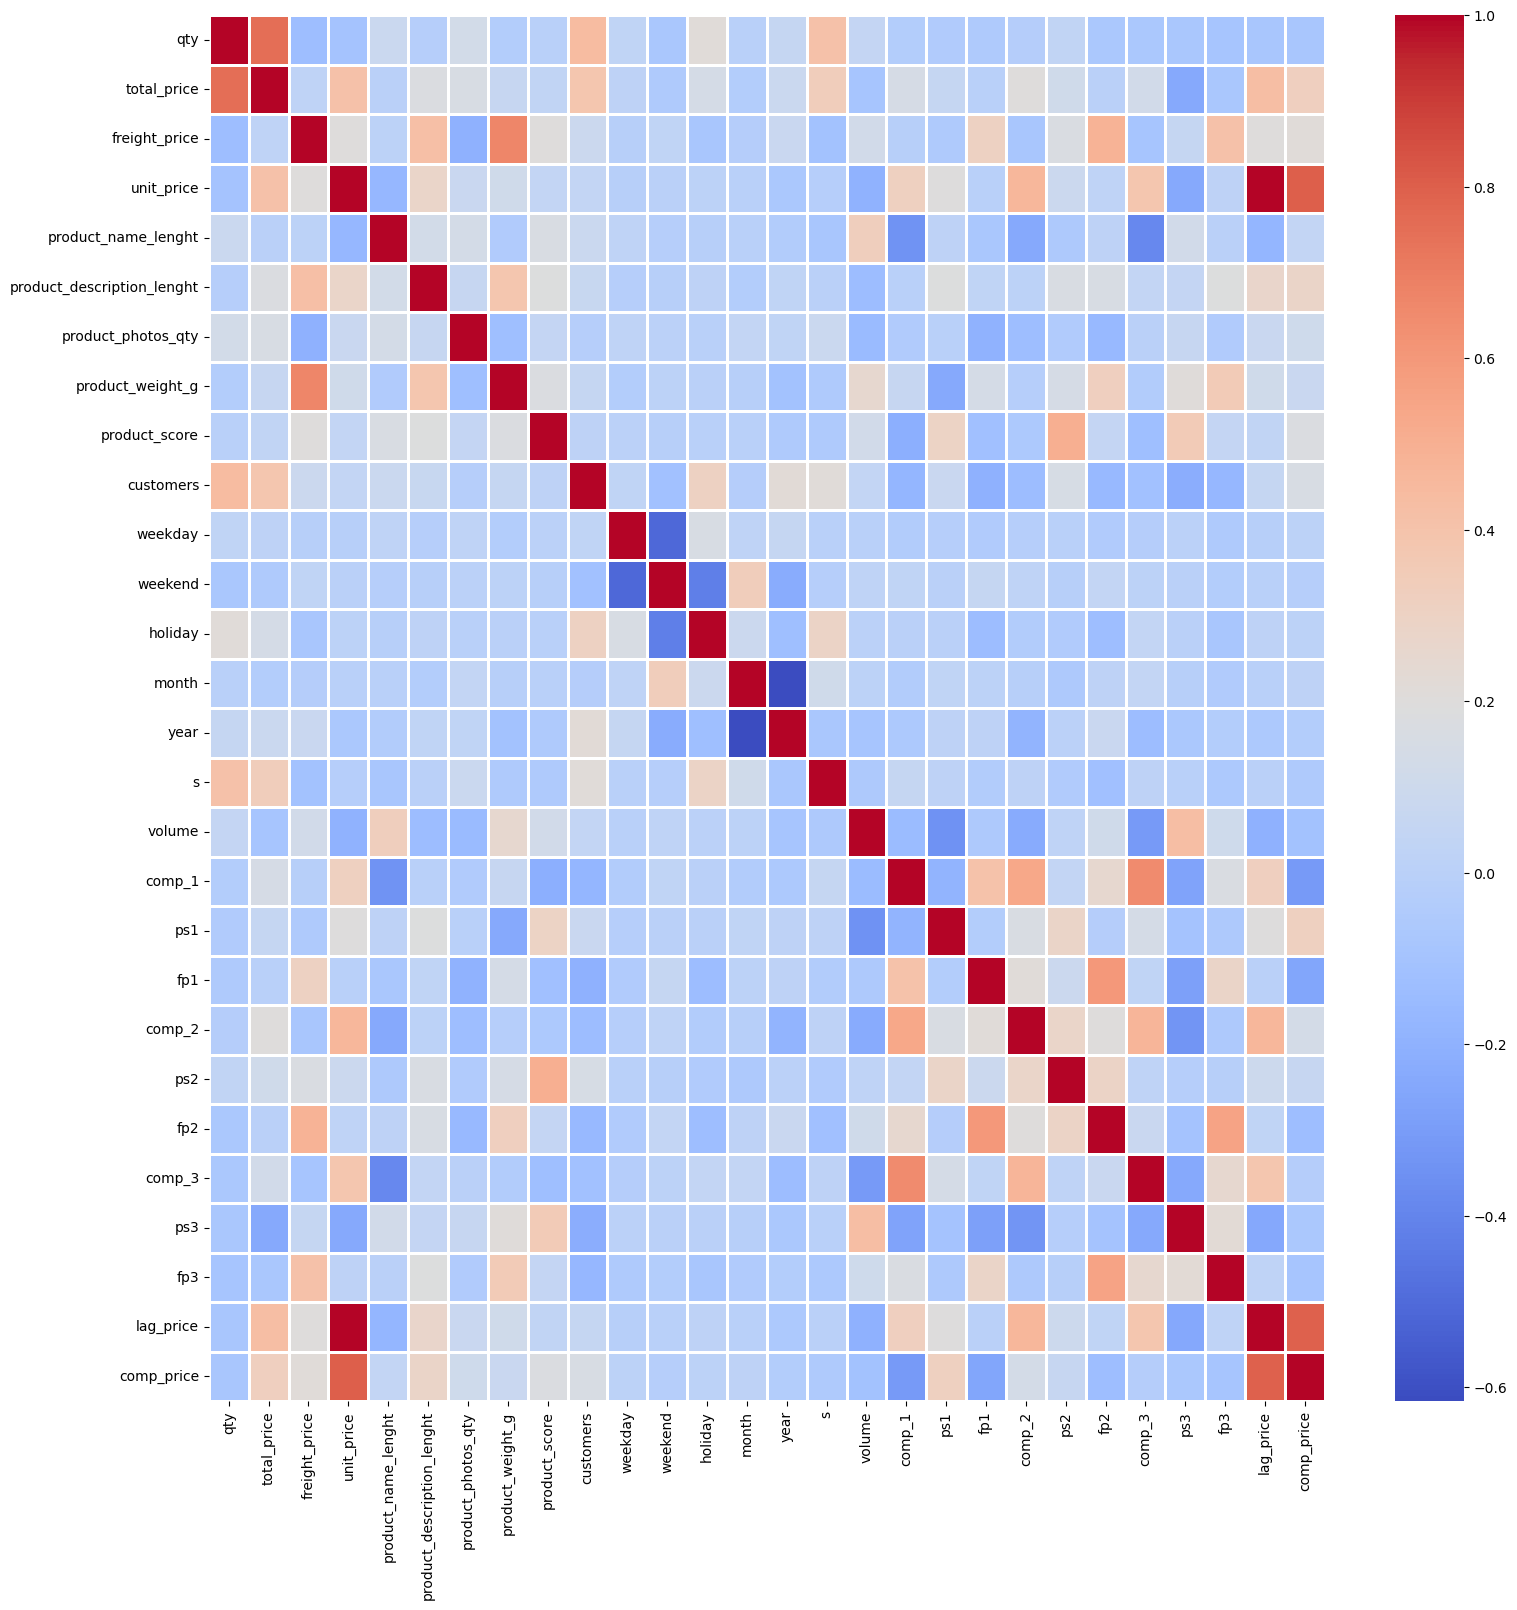

In [28]:
# Graph heatmap of correlation
plt.figure(figsize=(18,18))
sns.heatmap(rp_df.corr(numeric_only=True), cmap='coolwarm', linewidths=1)
plt.show()

## 3. Data preprocessing

In [29]:
# Tree based Feature Selection, importing scikit-learn
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold
from sklearn.preprocessing import RobustScaler

In [30]:
cat

['product_id', 'product_category_name', 'month_year']

In [31]:
# Split data into featue X and y for feature selection
X = rp_df.drop(columns=['total_price','product_id', 'product_category_name', 'month_year'], axis=1)
y = rp_df['total_price']

In [32]:
X.shape

(676, 27)

In [33]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vt.fit_transform(X)

array([[  1.        ,  15.1       ,  45.95      , ...,  15.1       ,
         45.9       , -43.95      ],
       [  3.        ,  12.93333333,  45.95      , ...,  12.93333333,
         45.95      , -43.95      ],
       [  6.        ,  14.84      ,  45.95      , ...,  14.84      ,
         45.95      , -43.95      ],
       ...,
       [ 59.        ,  22.1959322 , 205.        , ...,  14.84      ,
        209.        , 115.1       ],
       [ 52.        ,  19.41288462, 199.5098039 , ...,  14.2875    ,
        205.        , 109.6098039 ],
       [ 32.        ,  24.3246875 , 163.3987097 , ...,  15.1       ,
        199.5098039 ,  73.4987097 ]])

In [34]:
# VarianceTheshold given column names
vt.feature_names_in_

array(['qty', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'product_score', 'customers', 'weekday',
       'weekend', 'holiday', 'month', 'year', 's', 'volume', 'comp_1',
       'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'lag_price', 'comp_price'], dtype=object)

In [35]:
# VarianceTheshold variance values
vt.variances_

array([2.38146430e+02, 1.01492670e+02, 5.79525961e+03, 8.86185773e+01,
       4.28658562e+05, 2.01475789e+00, 5.16709867e+06, 5.37543328e-02,
       3.84519596e+03, 9.70963464e-01, 4.97135517e-01, 8.83101082e-01,
       1.05044379e+01, 2.49367582e-01, 1.42120936e+02, 8.40158259e+07,
       2.29420801e+03, 1.47772312e-02, 8.83520498e+01, 2.44477410e+03,
       4.28639360e-02, 4.12089605e+01, 2.27628804e+03, 5.43448234e-02,
       3.05716276e+01, 5.91633284e+03, 5.77688844e+03])

In [36]:
mi = mutual_info_regression(X, y)

In [37]:
imp = pd.Series(mi, X.columns[0:len(X.columns)])

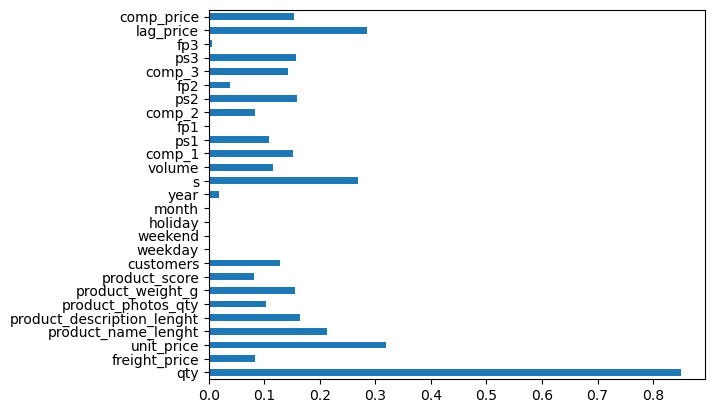

In [38]:
imp.plot(kind='barh')
plt.show()

In [39]:
# Split features into X and y
X = rp_df[['qty','unit_price','product_score','comp_1','comp_price']]
y = rp_df['total_price']

In [40]:
X_new = RobustScaler()
X_scaled = X_new.fit_transform(X)

In [41]:
X_scaled[0]

array([-0.64285714, -0.57760547, -0.33333333,  0.36800865, -1.12284437])

In [42]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [43]:
X_scaled.head(2)

,qty,unit_price,product_score,comp_1,comp_price
0,-0.642857,-0.577605,-0.333333,0.368009,-1.122844
1,-0.500000,-0.577605,-0.333333,0.368009,-1.122844


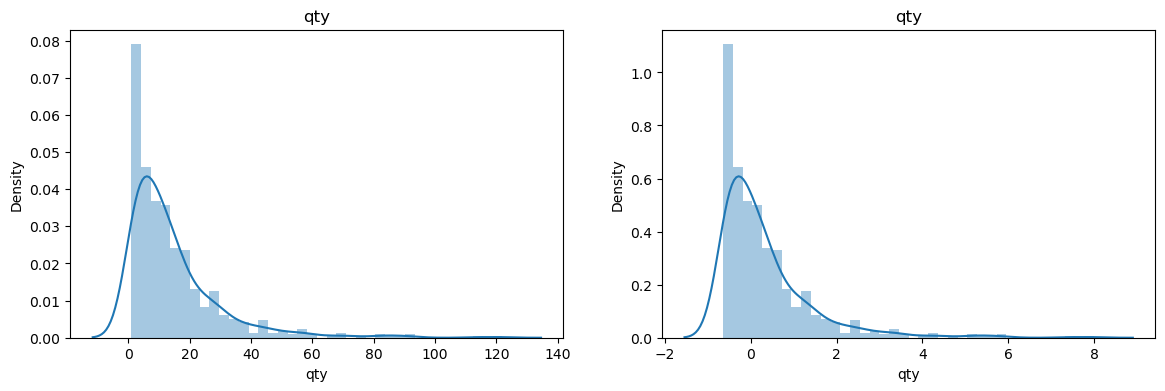

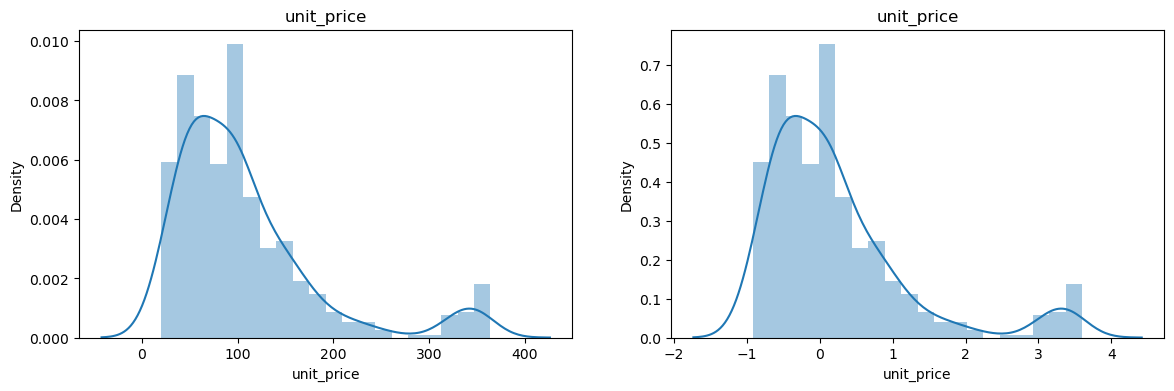

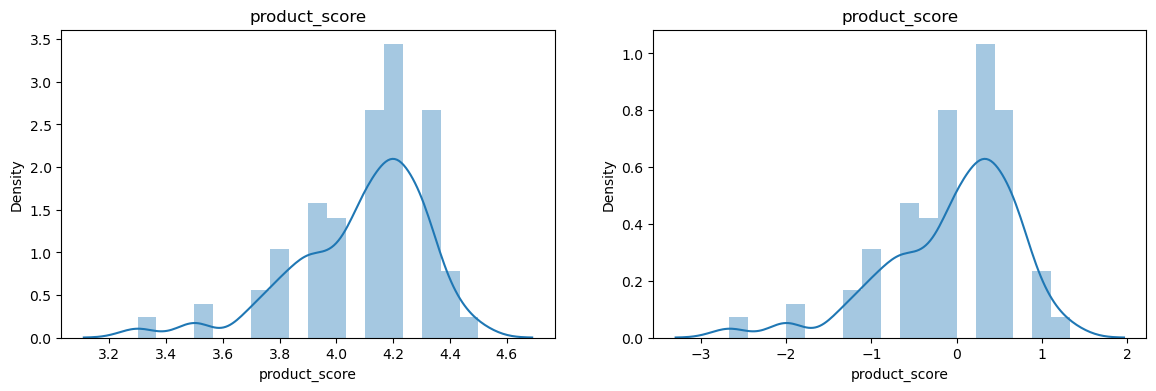

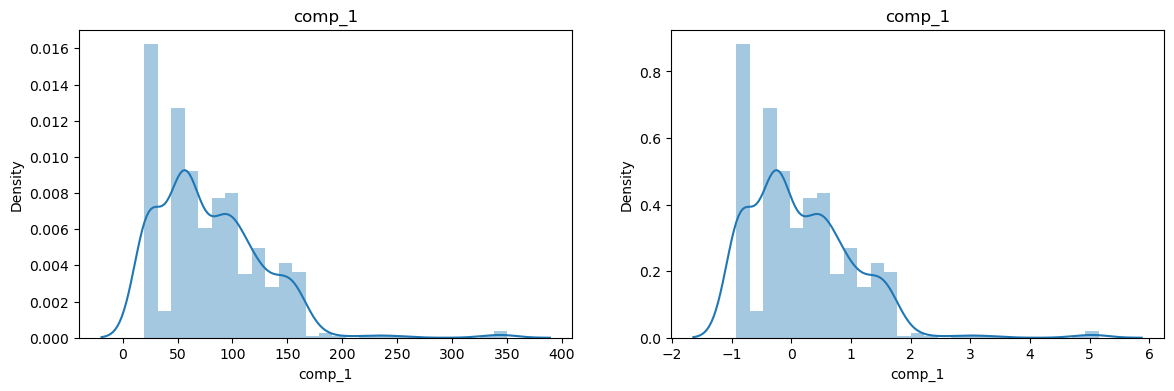

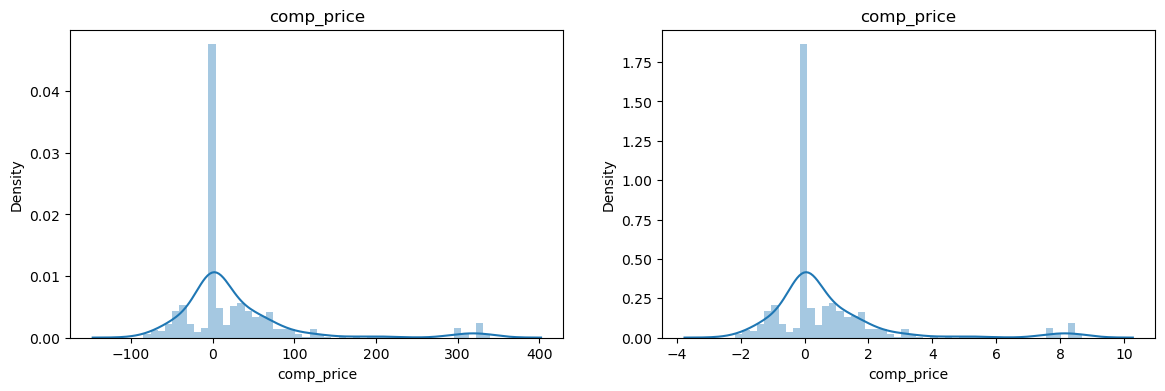

In [44]:
# Before and after comparision for Box-Cox Plot
for col in X_scaled.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_scaled[col])
    plt.title(col)

    plt.show()

## 4. Model building, validation and evaluation

In [45]:
# Import sklearn library for model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [46]:
# Split data into train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

In [47]:
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
xgr = XGBRegressor()
lgr = LGBMRegressor(verbose= -100)
ctr = CatBoostRegressor(verbose=False, metric_period=100)

In [48]:
models = [etr, gbr, xgr, ctr, lgr]

In [49]:
# Check the cross_val_score on all the models
def cross_src(model,X_trn,y_trn):
    src = np.round(cross_val_score(model, X_trn, y_trn, cv=5),2)
    msrc = np.round(np.mean(src),2)
    return src,msrc

In [50]:
# Testing with cross_val_score
result = []
mean_src = []

for model in models:
    cur_rst,cur_msrc = cross_src(model, X_train, y_train)
    print('Name ',model)
    print('\n')
    print('Result - ',cur_rst)
    print('Mean_score - ',cur_msrc)
    print('\n')
    
    result.append(cur_rst)
    mean_src.append(cur_msrc)

Name  ExtraTreesRegressor()


Result -  [1.   0.99 0.96 0.96 0.98]
Mean_score -  0.98


Name  GradientBoostingRegressor()


Result -  [0.98 0.99 0.97 0.97 0.97]
Mean_score -  0.98


Name  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Result -  [0.96 0.97 0.94 0.96 0.94]
Mean_score -  0.95


Name 

In [51]:
X_test.shape

(136, 5)

In [52]:
# Check the train or test all loss/metrics the models 
def train_regressor(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = np.round(mean_absolute_error(y_test,y_pred), 2)
    mape = np.round(mean_absolute_percentage_error(y_test,y_pred), 2)
    r2 = np.round(r2_score(y_test,y_pred), 2)
    ad_r2 = np.round(1-((1-r2)*(136-1) / (136-1-5)), 2)
    
    return y_test, y_pred, mae, mape, r2, ad_r2

In [53]:
# Train all models and get the traning loss/metrics evaluation
mae_src= []
mape_src= []
r2_src= []
adjt_r2 = []
train_src = []
test_src = []
results = []

for model in models:
    cur_y_test, cur_y_pred, cur_mae, cur_mape, cur_r2, cur_adj_r2 = train_regressor(model, X_train,y_train,X_test,y_test)
    
    print('Name ',model)
    print('\n')
    print('mean_absolute_err - ',cur_mae)
    print('mean_absolute_pre_err - ',cur_mape)
    print('r2_score - ',cur_r2)
    print('adjusted_r2_score - ',cur_adj_r2)

    mae_src.append(cur_mae)
    mape_src.append(cur_mape)
    r2_src.append(cur_r2)
    adjt_r2.append(cur_r2)
    
    results.append({
        'model': model.__class__.__name__,
        'y_actual': cur_y_test,
        'y_pred': cur_y_pred,
        'mae': cur_mae,
        'mape': cur_mape,
        'r2': cur_r2,
        'adj_r2': cur_adj_r2
    })
    
    print('\n *** Model Detail ***')
    train = np.round(model.score(X_train, y_train), 2)
    test = np.round(model.score(X_test, y_test), 2)
    print(f" Training Model score :\n {train}")
    print(f" Testing Model score :\n {test}")
    train_src.append(train)
    test_src.append(test)
    print('\n')

Name  ExtraTreesRegressor()


mean_absolute_err -  77.57
mean_absolute_pre_err -  0.03
r2_score -  0.96
adjusted_r2_score -  0.96

 *** Model Detail ***
 Training Model score :
 1.0
 Testing Model score :
 0.96


Name  GradientBoostingRegressor()


mean_absolute_err -  151.01
mean_absolute_pre_err -  0.17
r2_score -  0.94
adjusted_r2_score -  0.94

 *** Model Detail ***
 Training Model score :
 1.0
 Testing Model score :
 0.94


Name  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_

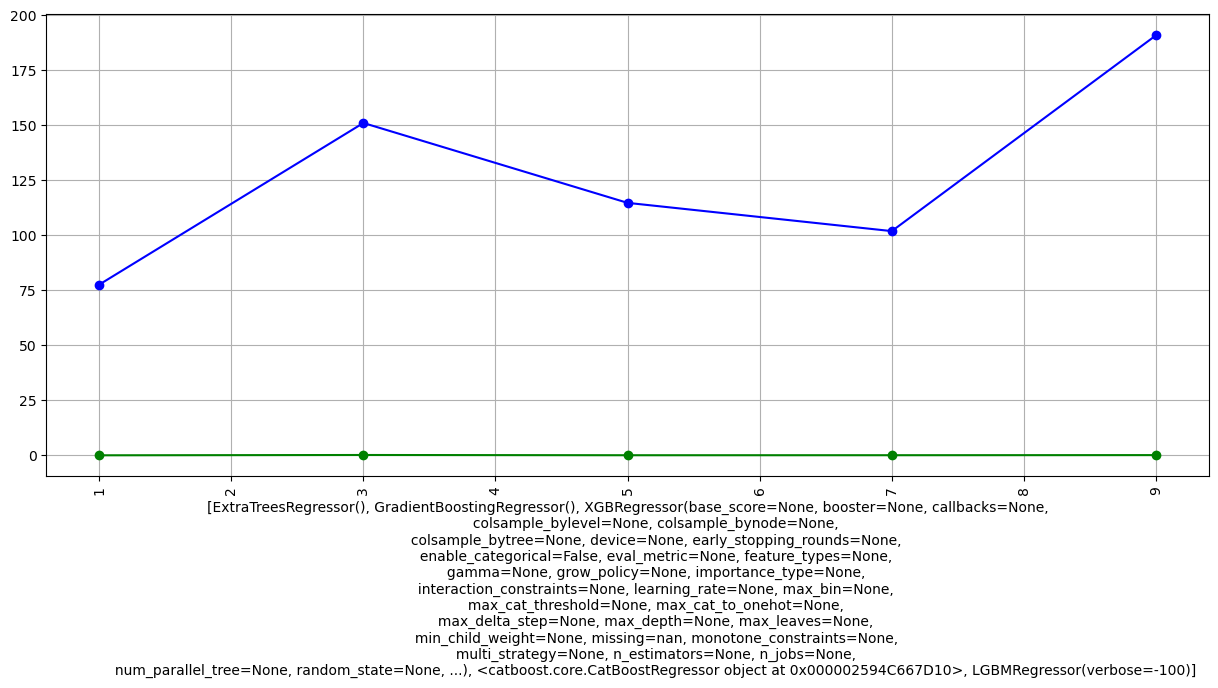

In [54]:
# Plotting the metrics graph of MAE & MAPE
epochs = range(len(models))
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(epochs, mae_src, '-o', color='blue', label='MAE')
plt.plot(epochs, mape_src, '-o', color='green', label='MAPE')

ax.set_xticklabels(range(0,11,1), rotation = 90)
ax.set_xlabel(xlabel= models)
plt.grid(visible=True)
plt.show()

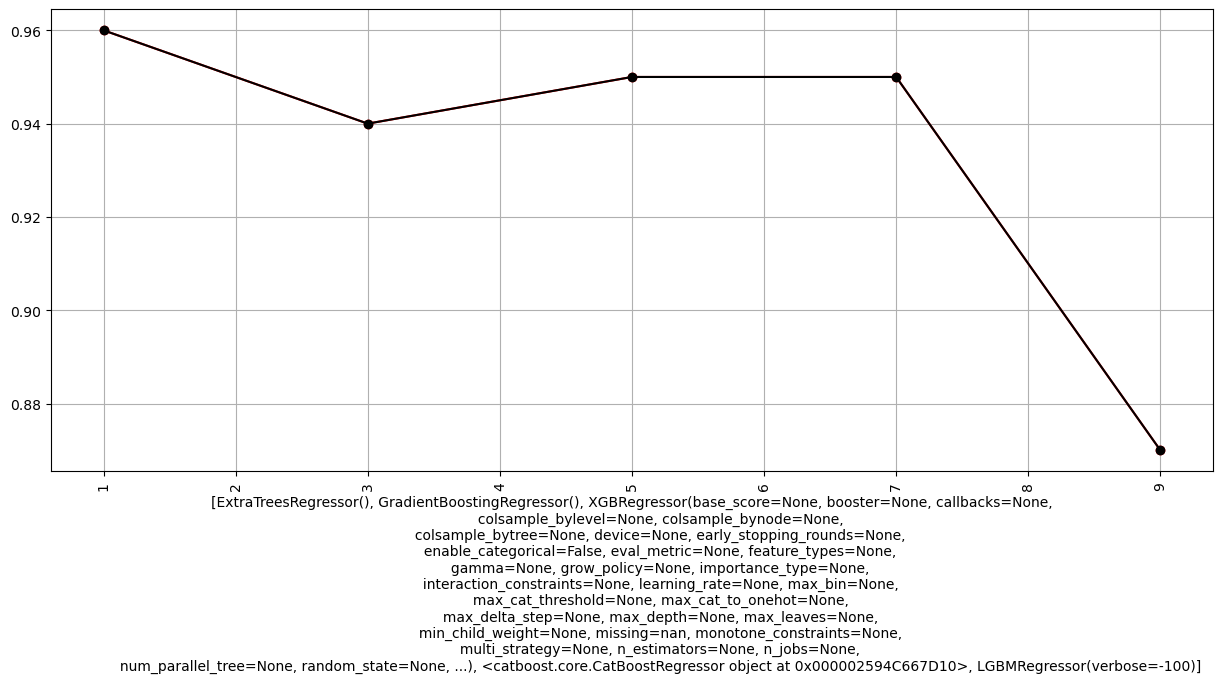

In [55]:
# Plotting the metrics graph of R2 & Adjusted R2
epochs = range(len(models))
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(epochs, r2_src, '-o', color='red', label='R2')
plt.plot(epochs, adjt_r2, '-o', color='black', label='Adjusted R2')

ax.set_xticklabels(range(0,11,1), rotation = 90)
ax.set_xlabel(xlabel= models)
plt.grid(visible=True)
plt.show()

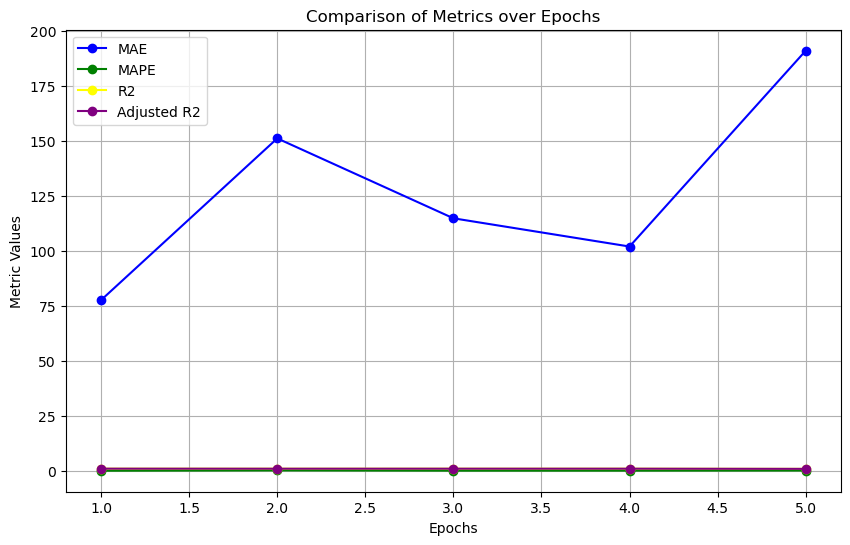

In [56]:
# Plotting the metrics graph
epochs = range(1, len(models) +1 )
plt.figure(figsize=(10, 6))

plt.plot(epochs, mae_src, marker='o', linestyle='-', color='blue', label='MAE')
plt.plot(epochs, mape_src, marker='o', linestyle='-', color='green', label='MAPE')
plt.plot(epochs, r2_src, marker='o', linestyle='-', color='yellow', label='R2')
plt.plot(epochs, adjt_r2, marker='o', linestyle='-', color='purple', label='Adjusted R2')

plt.title('Comparison of Metrics over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metric Values')
plt.grid(visible=True)
plt.legend()
plt.show()

In [57]:
# All models error scores are convert into dataframe
perform_df = pd.DataFrame({'Algorithm': models, 'MAE': mae_src, 'MAPE': mape_src, 'R2': r2_src, 'Adjusted R2': adjt_r2, 'Model Train Score': train_src, 'Model Test Score': test_src})

In [58]:
perform_df

,Algorithm,MAE,MAPE,R2,Adjusted R2,Model Train Score,Model Test Score
0,"(ExtraTreeRegressor(random_state=298504740), E...",77.57,0.03,0.96,0.96,1.00,0.96
1,([DecisionTreeRegressor(criterion='friedman_ms...,151.01,0.17,0.94,0.94,1.00,0.94
2,"XGBRegressor(base_score=None, booster=None, ca...",114.71,0.06,0.95,0.95,1.00,0.95
3,<catboost.core.CatBoostRegressor object at 0x0...,101.88,0.07,0.95,0.95,1.00,0.95
4,LGBMRegressor(verbose=-100),190.84,0.12,0.87,0.87,0.97,0.87


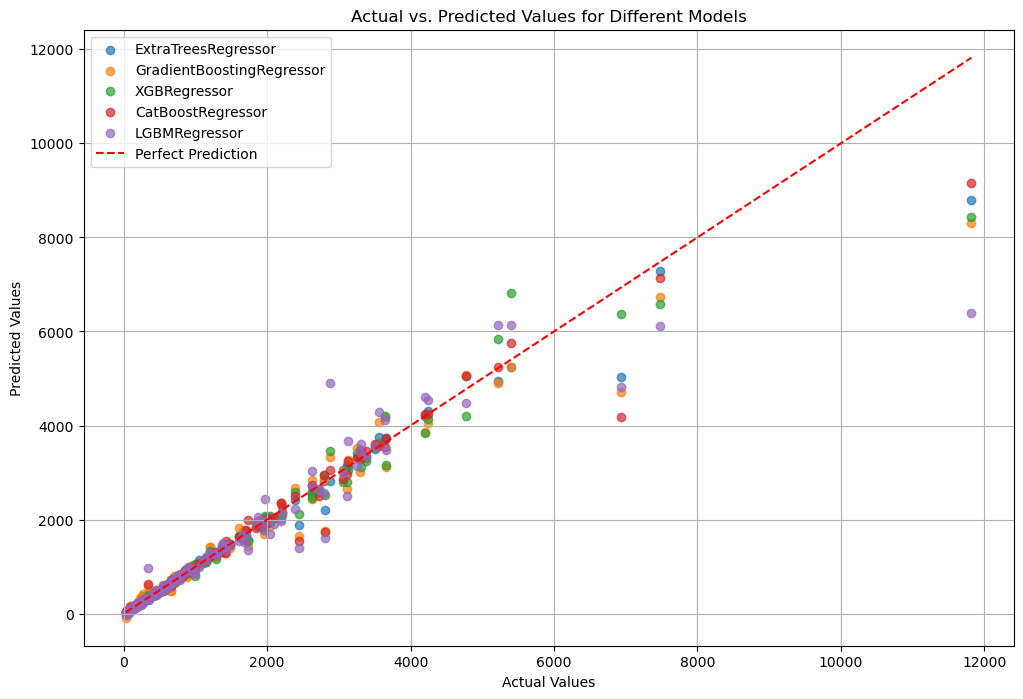

In [59]:
# Plotting actual vs. predicted values for each model
plt.figure(figsize=(12, 8))

for result in results:
    plt.scatter(result['y_actual'], result['y_pred'], label=result['model'], alpha=0.7)

plt.plot([min(cur_y_test), max(cur_y_test)], [min(cur_y_test), max(cur_y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Actual vs. Predicted Values for Different Models')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.show()

## 5. Model testing

In [60]:
X_scaled.tail(8)

,qty,unit_price,product_score,comp_1,comp_price
668,-0.571429,-0.551978,0.333333,0.252999,-0.913339
669,-0.428571,-0.551978,0.333333,0.184004,-0.817543
670,-0.571429,-0.551978,0.333333,0.147817,-0.767298
671,-0.642857,1.644106,1.000000,0.368009,3.196083
672,0.000000,1.565252,1.000000,0.368009,3.042793
673,3.500000,1.512682,1.000000,0.368009,2.940600
674,3.000000,1.440528,1.000000,0.368009,2.800336
675,1.571429,0.965944,1.000000,0.368009,1.877761


In [61]:
y[671]

215.0

In [62]:
rp_df.tail(8)[['qty', 'unit_price', 'product_score', 'comp_1', 'comp_price']]

,qty,unit_price,product_score,comp_1,comp_price
668,2,47.900000,4.2,83.649615,-35.749615
669,4,47.900000,4.2,79.900000,-32.000000
670,2,47.900000,4.2,77.933333,-30.033333
671,1,215.000000,4.4,89.900000,125.100000
672,10,209.000000,4.4,89.900000,119.100000
673,59,205.000000,4.4,89.900000,115.100000
674,52,199.509804,4.4,89.900000,109.609804
675,32,163.398710,4.4,89.900000,73.498710


In [63]:
# User input
user_input = np.array([1, 215.0, 4.4, 89.90, 125.10]).reshape(1, -1)
user_input

array([[  1. , 215. ,   4.4,  89.9, 125.1]])

In [64]:
for model in models:
    trf = X_new.transform(user_input)
    pred = model.predict(trf)[0]
    
    print('Name ',model)
    print('Predicted amount - ', np.round(pred,2))
    print('\n')

Name  ExtraTreesRegressor()
Predicted amount -  215.0


Name  GradientBoostingRegressor()
Predicted amount -  181.35


Name  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Predicted amount -  213.96


Name  <catboost.core.CatBoostRegressor object at 0x000002594C667D10>
Predicted amount -  201.6


Na